## ĐỒ ÁN CUỐI KỲ 

## Lập trình cho Khoa học dữ liệu - CQ2022/21

Nhóm thực hiện
<table>
    <tr>
        <th style="text-align: center;">Họ và tên</th>
        <th style="text-align: center;">MSSV</th>
    </tr>
        <td>Phan Bá Đức</td>
        <td>22120071</td>
    <tr>
    </tr>
        <td>Đặng Duy Lân</td>
        <td>22120182</td>
    <tr>
    </tr>
        <td>Nguyễn Nhật Long</td>
        <td>22120194</td>
    <tr>
</table>

**GVHD: ThS. Phạm Trọng Nghĩa**

---

# Mục lục

ở đây

# Nguồn dữ liệu

Dữ liệu mà tụi em sử dụng được lấy từ [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) ở trên Kaggle. 

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ luôn nằm trong top các nguyên nhân gây tử vong nhiều nhất trên toàn thế giới ([nguồn](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)). Dataset này được tác giả sử dụng để dự đoán xem một bệnh nhân liệu có bị đột quỵ hay không dựa trên các thông tin như tuổi, giới tính, các loại bệnh, tình trạng hút thuốc,...

Đối với dataset này, tác giả đã không cung cấp nguồn của dữ liệu cũng như cách mà tác giả thu thập các dữ liệu này.

Ngoài ra, tác giả cũng đã cấp phép cho phép sử dụng dataset này vào mục đích giáo dục.

<center>
<image src=img/src.png>
</center>

# Khám phá và tiền xử lý dữ liệu

## Import các thư viện cần thiết

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [22]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Kích thước của tập dữ liệu

In [23]:
shape = df.shape
print(f'Số cột {shape[1]}')
print(f'Số dòng {shape[0]}')

Số cột 12
Số dòng 5110


## Ý nghĩa của các dòng trong dữ liệu

Mỗi dòng của dữ liệu là thông tin bệnh án của 1 bệnh nhân, gồm vài thông tin cụ thể như: giới tính, tuổi, tình trạng cao huyết áp, bệnh tim,...

## Dữ liệu có bị trùng lắp không

In [24]:
count_duplicate = df.duplicated().sum()
print(f'Có {count_duplicate} dòng bị trùng lắp' if count_duplicate > 0 else 'Không có dòng bị trùng lắp')

Không có dòng bị trùng lắp


## Các cột có ý nghĩa gì?

Mỗi cột là một đặc trưng tượng trưng cho chỉ số của 1 bệnh nhân, cụ thể như sau:

1) `id`: số định danh, mỗi người có một số khác nhau.

2) `gender`: giới tính, thuộc 1 trong 3 giá trị: "Male", "Female" hoặc "Other".

3) `age`: tuổi của bệnh nhân.

4) `hypertension`: tình trạng cao huyết áp của bệnh nhân, 1 nếu bệnh nhân bị cao huyết áp, 0 nếu ngược lại.

5) `heart_disease`: tình trạng bệnh tim của bệnh nhân, 1 nếu bệnh nhân bị bệnh tim, 0 nếu ngược lại.

6) `ever_married`: liệu bệnh nhân đã từng kết hôn hay chưa, "Yes" nếu đã từng kết hôn, "No" nếu ngược lại.

7) `work_type`: tình trạng công việc, cụ thể

    - "Children": trẻ em, chưa tham gia vào lao động.
    
    - "Govt_job": công việc trong các cơ quan chính phủ.
    
    - "Never_worked": chưa từng làm việc.

    - "Private": công việc trong các công ty, doanh nghiệp tư nhân hoặc các tổ chức phi chính phủ.

    - "Self-employed": lao động tự do.

8) `Residence_type`: nơi cư trú, "Rural" nếu ở nông thôn, "Urban" nếu ở thành thị.

9) `avg_glucose_level`: mức đường huyết trung bình.

10) `bmi`: chỉ số BMI.

11) `smoking_status`: tình trạng hút thuốc của bệnh nhân, cụ thể:

    - "formerly smoked": đã từng hút thuốc, đã bỏ. 

    - "never smoked": chưa bao giờ hút thuốc.

    - "smokes": hiện tại vẫn hút thuốc.  
    
    - "Unknown": không có thông tin.

12) `stroke`: liệu bệnh nhân có bị đột quỵ không, 1 là có, ngược lại là 0.

## Các cột có kiểu dữ liệu như thế nào? Có cột nào có kiểu không phù hợp không?

In [25]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Có vẻ như kiểu dữ liệu của các cột đã khá hợp lý, tuy nhiên có cột `id` tuy là giá trị số nguyên nhưng giá trị của nó không có ý nghĩa về độ lớn, do đó em sẽ chuyển sang kiểu category.

In [26]:
df['id'] = df['id'].astype('category')
df.dtypes

id                   category
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object

## Với các cột có kiểu dữ liệu là continuous

- Giá trị chúng được phân bố như thế nào? 
- Chúng bị thiếu bao nhiêu phần trăm? 
- Min, Max là bao nhiêu? Có giá trị ngoại lai không?


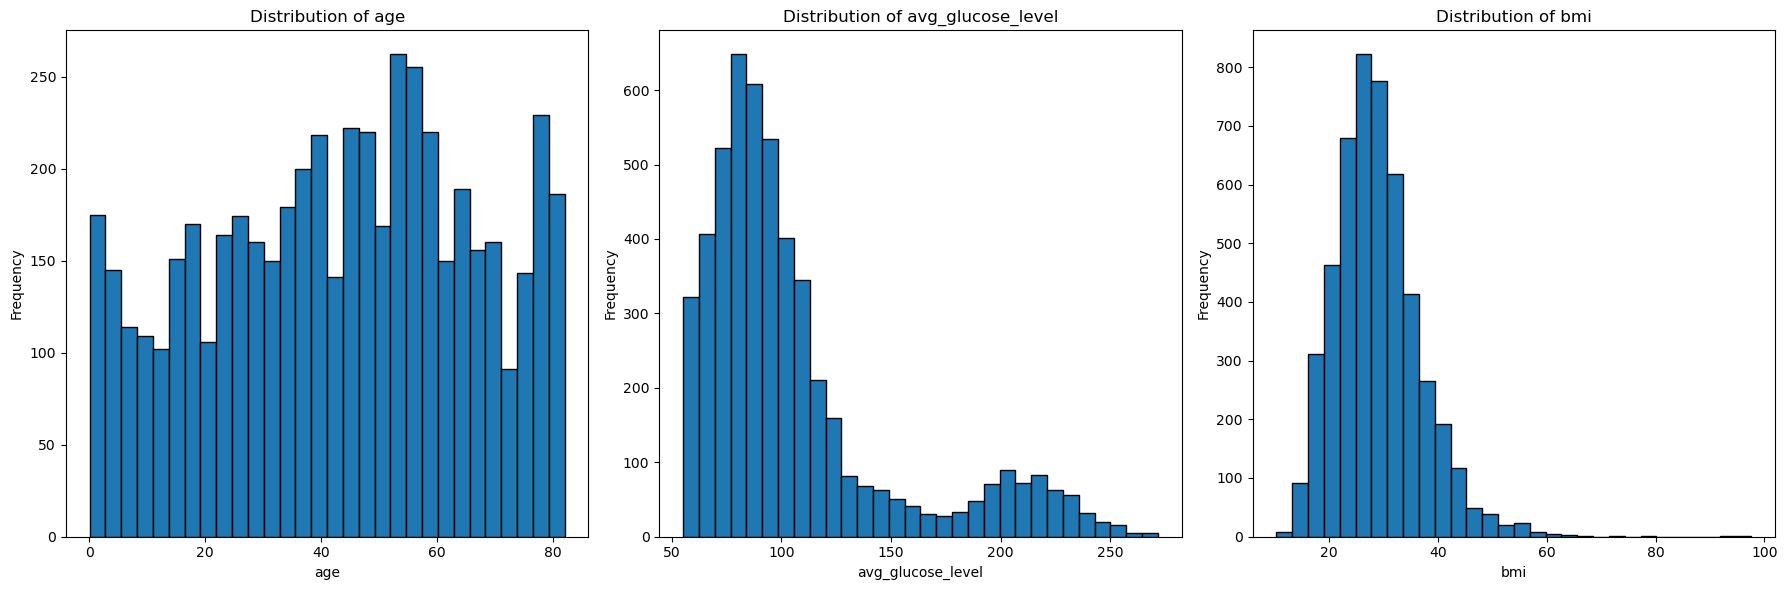

Numerical Features Analysis:
              Column  Missing Percentage (%)  Min Value  Max Value  \
0                age                    0.00       0.08      82.00   
1  avg_glucose_level                    0.00      55.12     271.74   
2                bmi                    3.93      10.30      97.60   

                                     Abnormal Values  
0                                                 []  
1                                                 []  
2  [60.9, 64.8, 60.2, 71.9, 78.0, 66.8, 97.6, 63....  


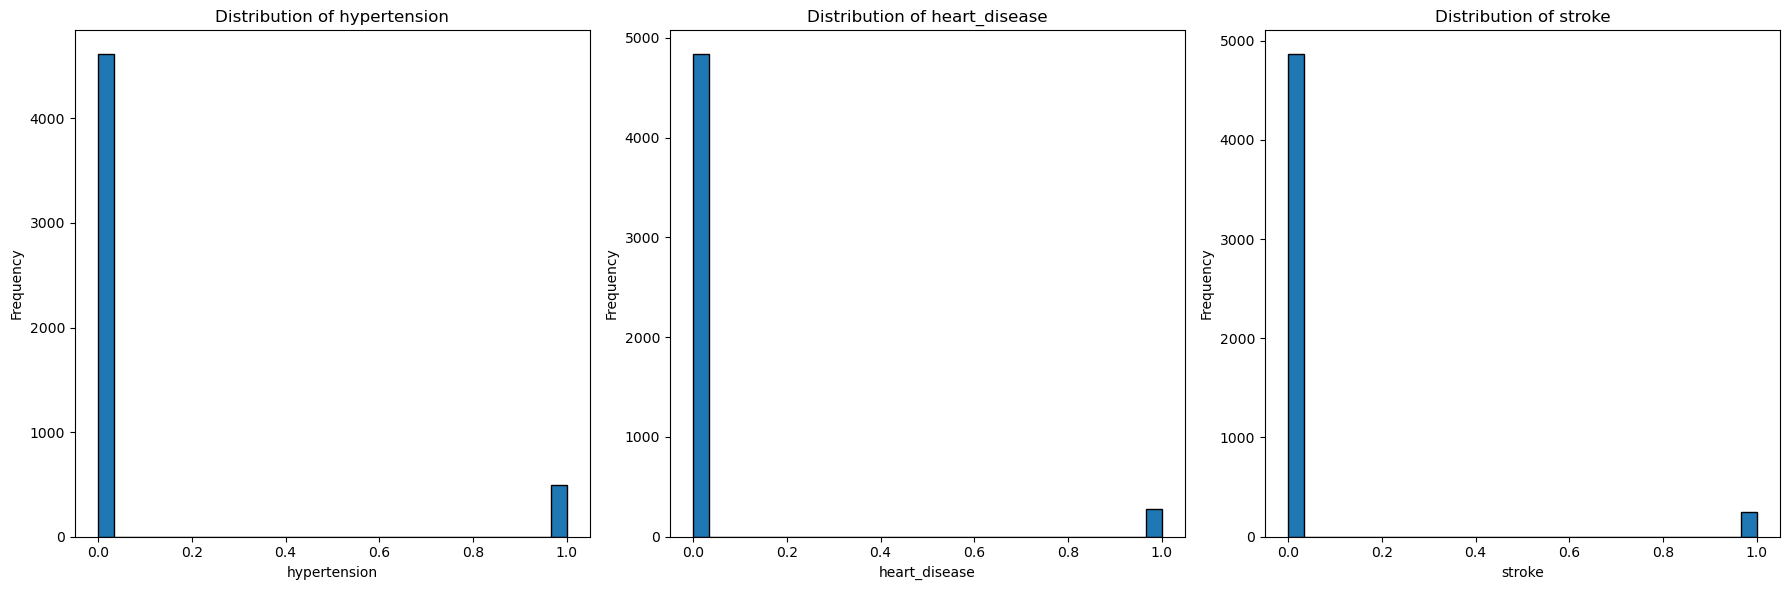


Binary Numerical Features Analysis:
          Column  Missing Percentage (%)  Min Value  Max Value Abnormal Values
0   hypertension                     0.0          0          1              []
1  heart_disease                     0.0          0          1              []
2         stroke                     0.0          0          1              []


In [27]:
# Replace with the names of your numerical and binary numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
binary_numerical_columns = ['hypertension', 'heart_disease', 'stroke']

# Function to calculate distribution and missing values for numerical columns
def analyze_numerical_features(df, numerical_columns):
    analysis = []

    # Create a single row of subplots (3 columns for the 3 histograms)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, col in enumerate(numerical_columns):
        col_data = df[col]
        missing_percentage = col_data.isnull().mean() * 100
        col_min = col_data.min()
        col_max = col_data.max()
        mean = col_data.mean()
        std = col_data.std()
        median = col_data.median()
        abnormal_values = get_abnormal_values(col, col_data)

        # Store the analysis for each numerical column
        analysis.append({
            'Column': col,
            'Missing Percentage (%)': round(missing_percentage, 2),
            'Min Value': col_min,
            'Max Value': col_max,
            'Mean': round(mean, 2),
            'Std Dev': round(std, 2),
            'Median': median,
            'Abnormal Values': abnormal_values
        })
        
        # Plot distribution (histogram) for numerical columns in the corresponding subplot
        axes[i].hist(col_data, bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(analysis)

# Function to check for abnormal values
def get_abnormal_values(column_name, col_data):
    if column_name == 'bmi':
        abnormal = col_data[(col_data < 0) | (col_data > 60)]
    else:
        abnormal = col_data[col_data < 0]
    return abnormal.tolist()

# Run the analysis for numerical columns
numerical_results = analyze_numerical_features(df, numerical_columns)
print("Numerical Features Analysis:")
print(numerical_results[['Column', 'Missing Percentage (%)', 'Min Value', 'Max Value','Abnormal Values']])

# Run the analysis for binary numerical columns
binary_results = analyze_numerical_features(df, binary_numerical_columns)
print("\nBinary Numerical Features Analysis:")
print(binary_results[['Column', 'Missing Percentage (%)', 'Min Value', 'Max Value', 'Abnormal Values']])


## Với các cột có kiểu dữ liệu là categorical

- Các giá trị được phân bố như thế nào?

- Chúng bị thiếu bao nhiêu phần trăm?

- Có bao nhiêu giá trị độc nhất? Ví dụ?

- Có giá trị nào khác thường không?

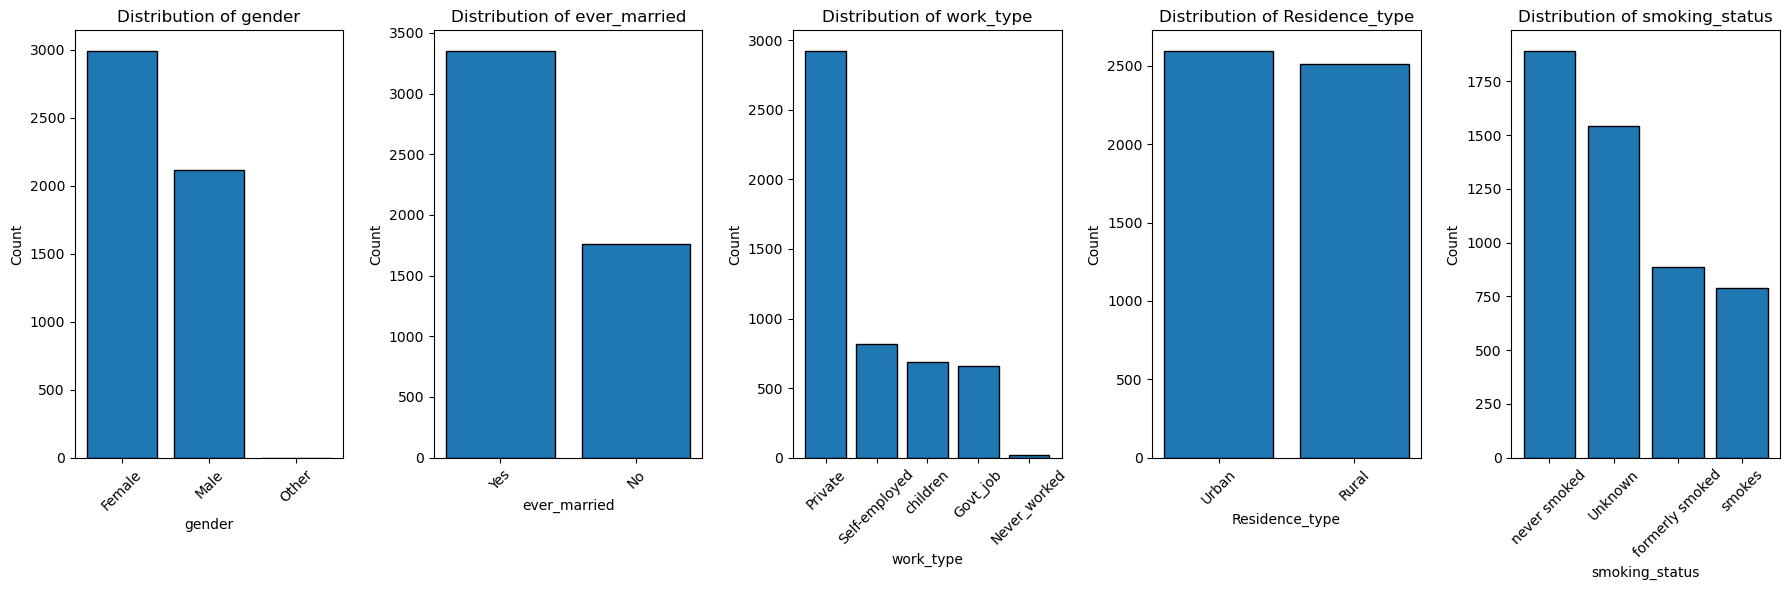


Categorical Features Analysis:
           Column  Missing Percentage (%)  Number of Unique Values  \
0          gender                     0.0                        3   
1    ever_married                     0.0                        2   
2       work_type                     0.0                        5   
3  Residence_type                     0.0                        2   
4  smoking_status                     0.0                        4   

                             Sample of Unique Values Abnormal Values  \
0                              [Male, Female, Other]              []   
1                                          [Yes, No]              []   
2  [Private, Self-employed, Govt_job, children, N...              []   
3                                     [Urban, Rural]              []   
4   [formerly smoked, never smoked, smokes, Unknown]              []   

                                    Distribution (%)  
0  {'Female': 58.590998043052835, 'Male': 41.3894...  
1  {

In [28]:


# Replace with the names of your categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Function to analyze categorical features
def analyze_categorical_features(df, categorical_columns):
    analysis = []

    # Create a single row of subplots (5 columns for the 5 bar charts)
    fig, axes = plt.subplots(1,5, figsize=(18, 6))

    for i, col in enumerate(categorical_columns):
        col_data = df[col]
        missing_percentage = col_data.isnull().mean() * 100
        unique_values = col_data.unique().tolist()  # Get all unique values
        num_unique_values = len(unique_values)
        value_counts = col_data.value_counts().to_dict()
        abnormal_values = get_abnormal_categorical_values(col, col_data)

        # Show distribution (value counts and percentage)
        distribution = col_data.value_counts(normalize=True) * 100  # Percentage distribution

        analysis.append({
            'Column': col,
            'Missing Percentage (%)': round(missing_percentage, 2),
            'Number of Unique Values': num_unique_values,
            'Sample of Unique Values': unique_values[:5],  # Display all unique values
            'Abnormal Values': abnormal_values,
            'Distribution (%)': distribution.to_dict()  # Percentage distribution of categories
        })
        
        # Plot distribution (bar chart) for categorical columns in the corresponding subplot
        value_counts = col_data.value_counts()  # Get the count of each unique value
        axes[i].bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    return pd.DataFrame(analysis)

# Function to check for abnormal values in categorical columns
def get_abnormal_categorical_values(column_name, col_data):
    # Define known valid values for specific columns if needed
    known_valid_values = {
        'gender': ['Male', 'Female', 'Other'],
        'ever_married': ['Yes', 'No'],
        'work_type': ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
        'Residence_type': ['Urban', 'Rural'],
        'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
    }

    if column_name in known_valid_values:
        invalid_values = col_data[~col_data.isin(known_valid_values[column_name])]
        return invalid_values.unique().tolist()
    return []

# Run the analysis for categorical columns
categorical_results = analyze_categorical_features(df, categorical_columns)
print("\nCategorical Features Analysis:")
print(categorical_results[['Column', 'Missing Percentage (%)', 'Number of Unique Values', 'Sample of Unique Values', 'Abnormal Values', 'Distribution (%)']])


# Các câu hỏi có thể trả lời từ dataset

## Câu 1: Liệu rằng có sự khác nhau giữa nguy cơ bị đột quỵ giữa nam giới và nữ giới hay không?

Ý nghĩa: Trả lời câu hỏi này sẽ giúp chúng ta tìm hiểu rõ liệu nam giới hay nữ giới có nguy cơ cao hơn giúp tăng cường nhận thức cộng đồng về tầm quan trọng của việc phòng ngừa đột quỵ. Nếu một giới tính cụ thể được xác định là có nguy cơ cao hơn, chúng ta có thể tạo ra các chiến lược giáo dục đặc biệt để nhắm vào nhóm này, nhấn mạnh sự cần thiết của việc kiểm tra sức khỏe định kỳ và thay đổi lối sống. Còn nếu không thể kết luận rằng một giới tính nào là có nguy cơ bị đột quỵ cao hơn, điều đó nghĩa là đột quỵ có thể xảy ra với bất kỳ ai, không kể giới tính thì ta có thể tập trung vào những nhóm có yếu tố nguy cơ cao như người mắc bệnh tim, bệnh tiểu đường,...

## Câu 2: Mối quan hệ giữa tuổi tác và đột quỵ là gì?

Ý nghĩa: Tìm hiểu mối liên hệ giữa tuổi tác và đột quỵ mang ý nghĩa quan trọng trong việc hiểu rõ nguy cơ đột quỵ theo độ tuổi, giúp xác định các nhóm tuổi có nguy cơ cao để tập trung các biện pháp phòng ngừa hiệu quả. Điều này hỗ trợ phát triển các chiến lược y tế công cộng phù hợp, như giáo dục sức khỏe, kiểm soát huyết áp, hoặc giảm thiểu các yếu tố nguy cơ khác. Bên cạnh đó, việc phân tích mối quan hệ này còn giúp phát hiện sự tương tác giữa tuổi và các yếu tố nguy cơ, đồng thời phát hiện sớm đột quỵ ở nhóm người trẻ tuổi. Từ đó, các chính sách y tế có thể được điều chỉnh để quản lý nguồn lực tốt hơn, cải thiện hệ thống cảnh báo và nâng cao nhận thức cộng đồng. Cuối cùng, việc nghiên cứu này góp phần kéo dài tuổi thọ khỏe mạnh, giảm gánh nặng bệnh tật, và nâng cao chất lượng cuộc sống cho toàn xã hội.

## Câu 3: Sự kết hợp của các yếu tố nào làm gia tăng nguy cơ đột quỵ cao nhất? Làm thế nào để phát triển mô hình dự đoán nguy cơ đột quỵ hiệu quả? Những yếu tố nào ảnh hưởng đến nguy cơ đột quỵ?

Ý nghĩa:

# Tìm câu trả lời cho các câu hỏi

## Câu 1: Liệu rằng có sự khác nhau giữa nguy cơ bị đột quỵ giữa nam giới và nữ giới hay không?

Các bước trả lời câu hỏi:

- **Bước 1:** chọn ra các đặc trưng mà có khả năng sẽ ảnh hưởng tới nguy cơ bị đột quỵ dựa vào ma trận tương quan, kinh nghiệm.
- **Bước 2:** vẽ biểu đồ so sánh, phân tích.
- **Bước 3:** tính số người bị đột quỵ cho từng giới tính.
- **Bước 4:** dùng kiểm định thống kê để kiểm chứng giả thuyết, kết luận.

### Bước 1: chọn ra các đặc trưng mà có khả năng sẽ ảnh hưởng tới nguy cơ bị đột quỵ dựa vào ma trận tương quan, kinh nghiệm.

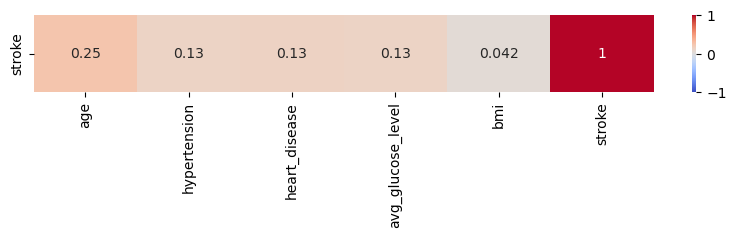

In [29]:
corr_matrix = df.corr()[['stroke']].T
plt.figure(figsize=(10, 1))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Có thể thấy các đặc trưng đều có tương quan dương, điều đó cho thấy mối quan hệ cùng chiều (nếu giá trị của một yếu tố tăng, nguy cơ đột quỵ cũng tăng). Tuy nhiên các giá trị này không quá lớn, nên việc chọn các đặc trưng không quá có giá trị, nên dựa vào kinh nghiệm của mình, nhóm sẽ chọn ra các đặc trưng sau: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`.

### Bước 2: vẽ biểu đồ so sánh, phân tích.

Tìm số bệnh nhân có giới tính khác nam và nữ.

In [30]:
(df['gender'] == 'Other').sum()

1

Có thể thấy là chỉ có 1 bệnh nhân không biết giới tính, số lượng không nhiều nên nhóm sẽ bỏ qua bệnh nhân này. Tiếp theo nhóm sẽ tính số lượng nam và nữ trong dataset.

In [31]:
data = df.loc[df['gender'] != 'Other']
m_df = df[df['gender'] == 'Male']
f_df = df[df['gender'] == 'Female']

print(f'Số lượng nam giới: {len(m_df)} ({len(m_df) / (len(m_df) + len(f_df)) * 100:.3f}%)')
print(f'Số lượng nữ giới: {len(f_df)} ({len(f_df) / (len(m_df) + len(f_df)) * 100:.3f}%)')

Số lượng nam giới: 2115 (41.398%)
Số lượng nữ giới: 2994 (58.602%)


Đầu tiên, chia 4 đặc trưng đã chọn ra làm 2 nhóm:

- `age` và `avg_glucose_level`.

- `hypertension` và `heart_disease`.

Chia ra 2 nhóm bởi vì `hypertension` và `heart_disease` chỉ có giá trị 0 và 1, điều này sẽ giúp cho việc vẽ và phân tích biểu đồ dễ dàng hơn.

Vẽ boxplot và histogram cho `age` và `avg_glucose_level`.

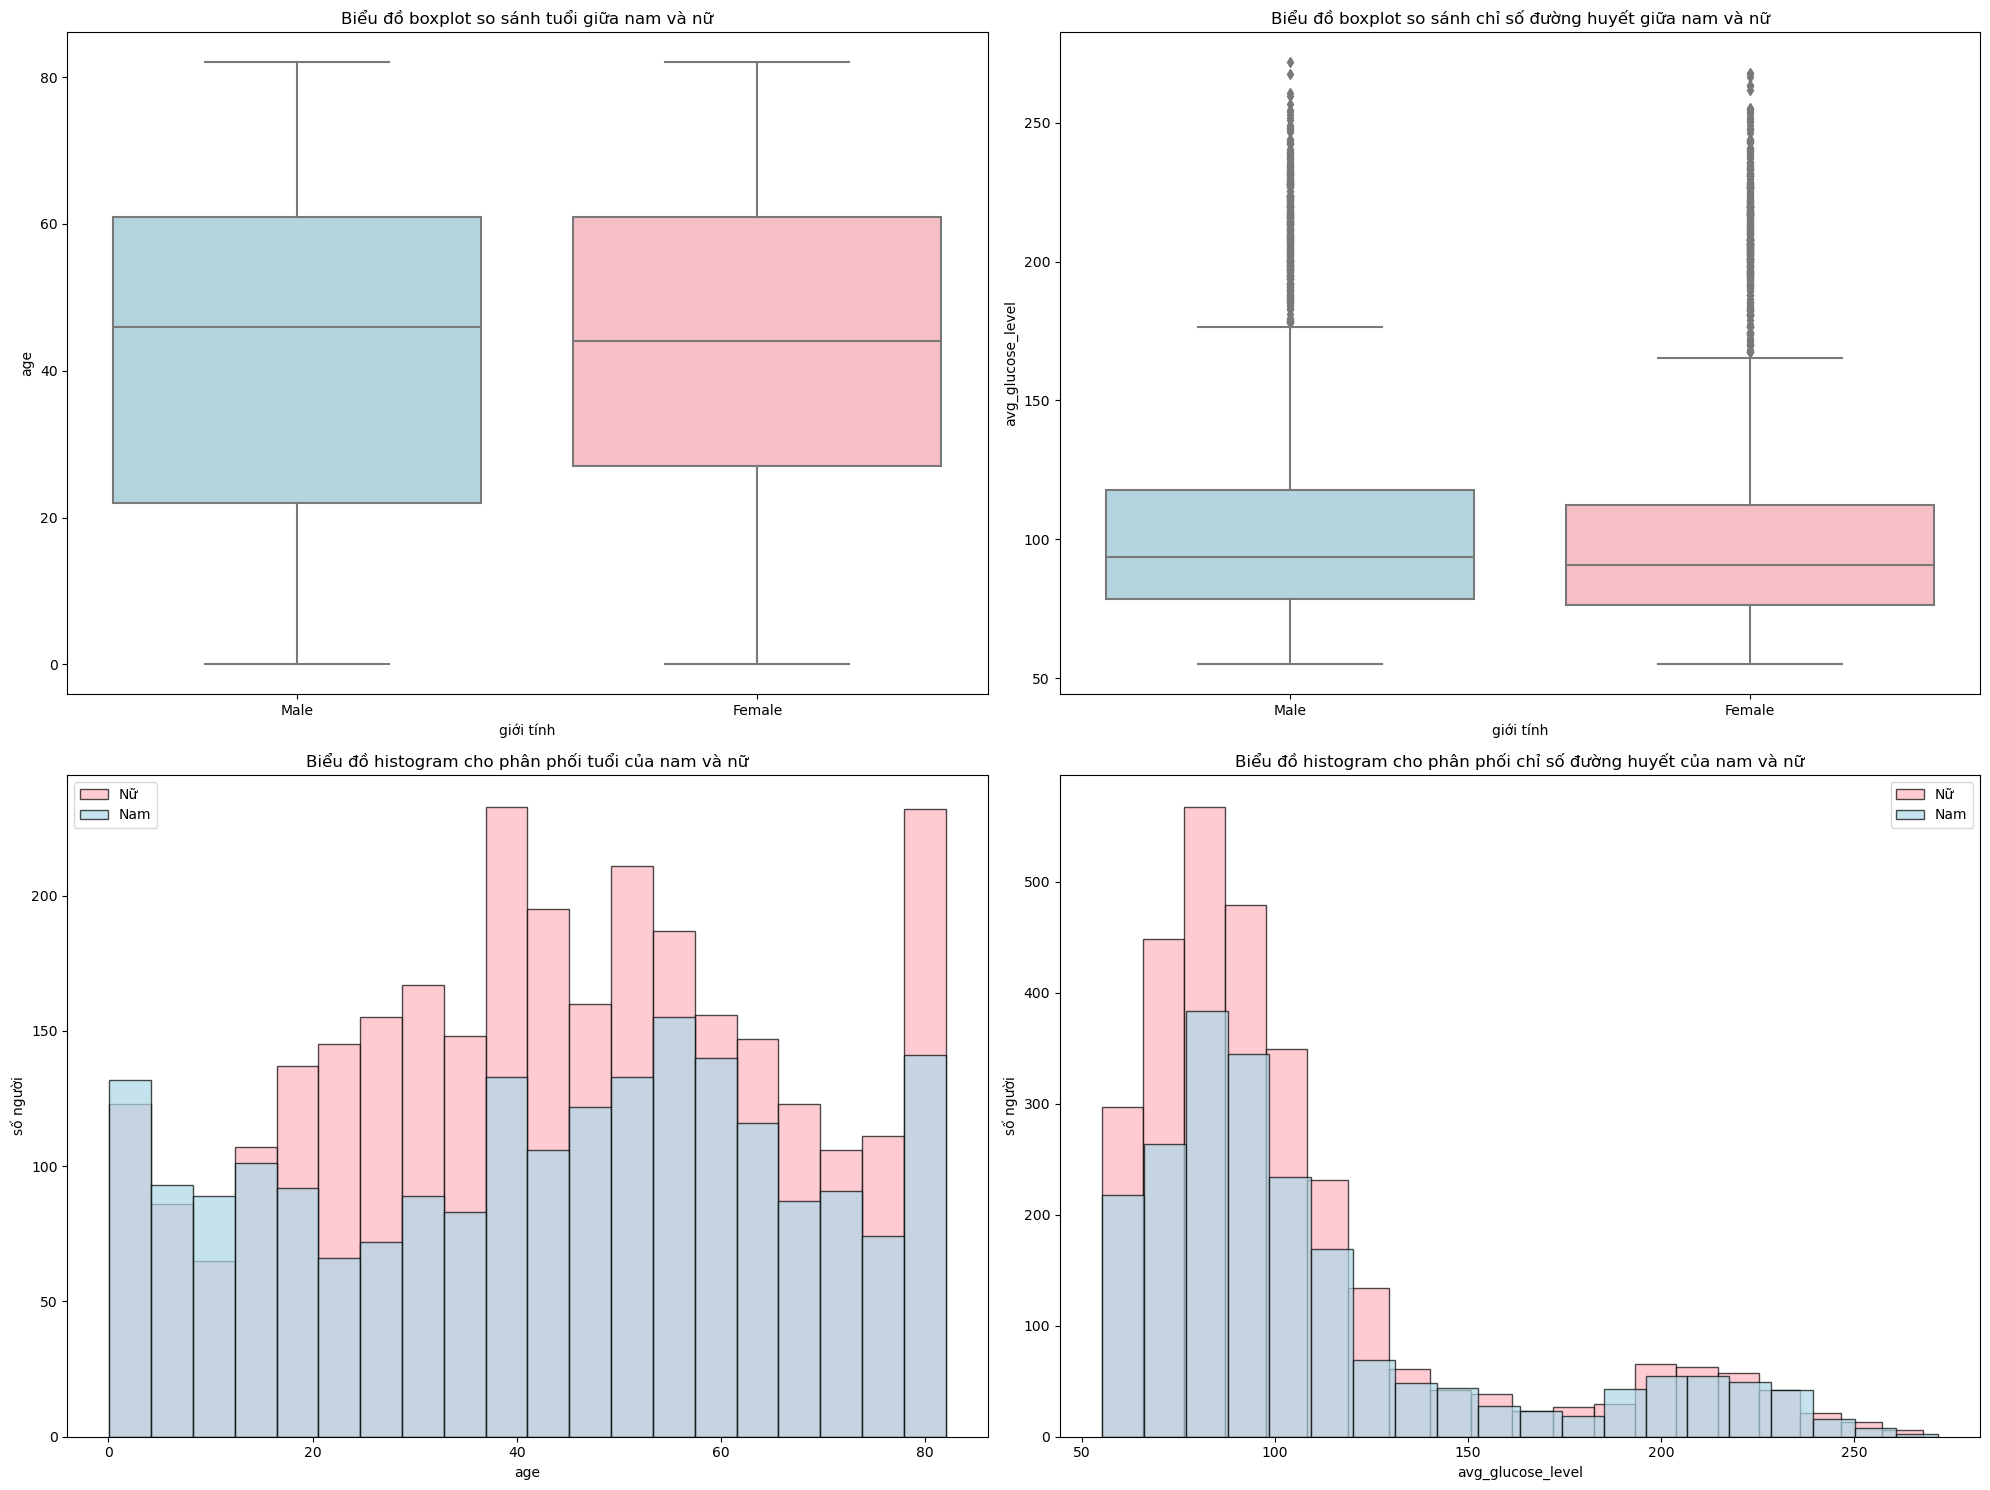

In [32]:
fetures = ['age', 'avg_glucose_level']

# chuyển tên của cột sang tiếng Việt cho biểu đồ
name = {
    'age': 'tuổi',
    'avg_glucose_level': 'chỉ số đường huyết',
}
plt.figure(figsize=(20, 15))

for i, feature in enumerate(fetures, 1):
    # vẽ boxplot cho phân bố của "feature" theo nam và nữ
    plt.subplot(2, 2, i)
    sns.boxplot(x='gender', y=feature, data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})
    plt.title(f'Biểu đồ boxplot so sánh {name[feature]} giữa nam và nữ')
    plt.xlabel('giới tính')
    plt.ylabel(feature)
    
    # vẽ histogram cho phân bố của "feature" theo nam và nữ
    plt.subplot(2, 2, i + 2)
    plt.title(f'Biểu đồ histogram cho phân phối {name[feature]} của nam và nữ')
    plt.hist(f_df[feature], bins=20, color='lightpink', edgecolor='black', alpha=0.7, label='Female')
    plt.hist(m_df[feature], bins=20, color='lightblue', edgecolor='black', alpha=0.7, label='Male')
    plt.ylabel('số người')
    plt.xlabel(feature)
    plt.legend(['Nữ', 'Nam'])

plt.tight_layout()
plt.show()

Vẽ biểu đồ cột cho các đặc trưng còn lại.

Tỷ lệ người mắc cao huyết áp của nam và nữ:
Nam: 10.496%
Nữ: 9.218%
Tỷ lệ người mắc bệnh tim của nam và nữ:
Nam: 7.707%
Nữ: 3.774%


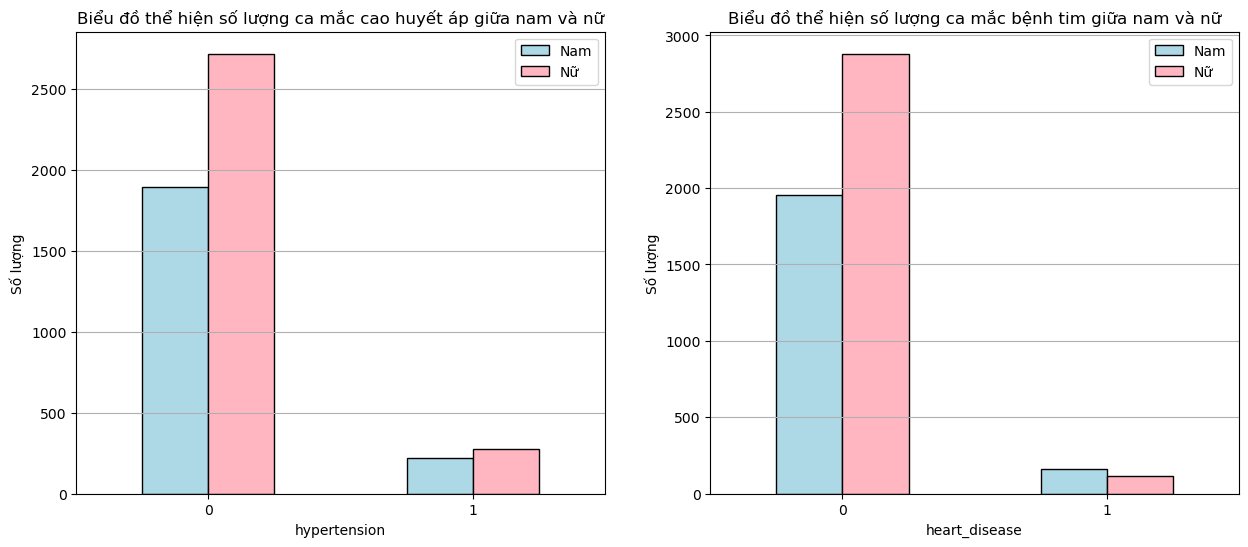

In [33]:
features = ['hypertension', 'heart_disease']

# chuyển tên của cột sang tiếng Việt cho biểu đồ
name = {
    'hypertension': 'cao huyết áp',
    'heart_disease': 'bệnh tim',
}
# tạo 2 biểu đồ theo hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# tính số lượng người mắc "feature", chuyển sang dataframe và trực quan
for i, feature in enumerate(features):
    m_counts = m_df[feature].value_counts().sort_index()
    f_counts = f_df[feature].value_counts().sort_index()
    
    df_plot = pd.DataFrame({'Male': m_counts, 'Female': f_counts})
    df_plot.plot(kind='bar', ax=axes[i], edgecolor='black', color=['lightblue', 'lightpink'])
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].set_title(f'Biểu đồ thể hiện số lượng ca mắc {name[feature]} giữa nam và nữ')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Số lượng')
    axes[i].yaxis.grid(True)
    axes[i].legend(['Nam', 'Nữ'])
    print(f'Tỷ lệ người mắc {name[feature]} của nam và nữ:')
    print(f'Nam: {m_counts[1] / (m_counts[0] + m_counts[1]) * 100:.3f}%')
    print(f'Nữ: {f_counts[1] / (f_counts[0] + f_counts[1]) * 100:.3f}%')


Nhận xét:

- Đối với 2 đặc trưng đầu: tuy có khác biệt về số lượng nam và nữ, nhưng hình dáng và cấu trúc trong cả 2 biểu đồ histogram là giống nhau, điều này cũng được thể hiện qua 2 biểu đồ boxplot.

- Đối với các đặc trưng còn lại: từ số liệu trên, có thể thấy tỷ lệ mắc cao huyết áp ở nam giới cao hơn nữ giới, còn đối với tỷ lệ mắc bệnh tim, nam giới cao gấp đôi nữ giới! Điều này có thể chỉ ra rằng nam giới có nguy cơ mắc cao huyết áp và bệnh tim cao hơn nữ giới. Các yếu tố như lối sống, chế độ ăn uống, mức độ căng thẳng và các thói quen xấu như hút thuốc và uống rượu,... có thể gây ra sự khác nhau này.

### Bước 3: tính số người bị đột quỵ cho từng giới tính.

Tính số người bị đột quỵ cho nam và nữ.

In [34]:
gender_df = data[['gender', 'stroke']]
male_stroke_counts = gender_df[gender_df['gender'] == 'Male']['stroke'].value_counts()
female_stroke_counts = gender_df[gender_df['gender'] == 'Female']['stroke'].value_counts()
gender_df.groupby('gender').sum().reset_index()

,gender,stroke
0,Female,141
1,Male,108


Vẽ biểu đồ thể hiện tỷ lệ người mắc đột quỵ cho nam và nữ.

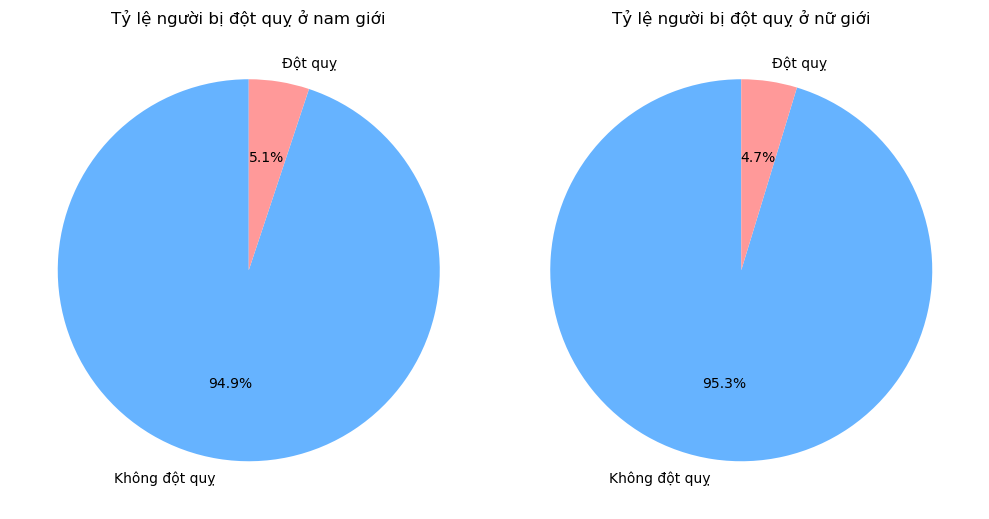

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Biểu đồ tròn cho nam
axes[0].pie(male_stroke_counts, labels=['Không đột quỵ', 'Đột quỵ'], autopct='%1.1f%%', startangle=90, colors=['#66B3FF', '#FF9999'])
axes[0].set_title('Tỷ lệ người bị đột quỵ ở nam giới')

# Biểu đồ tròn cho nữ
axes[1].pie(female_stroke_counts, labels=['Không đột quỵ', 'Đột quỵ'], autopct='%1.1f%%', startangle=90, colors=['#66B3FF', '#FF9999'])
axes[1].set_title('Tỷ lệ người bị đột quỵ ở nữ giới')

plt.tight_layout()
plt.show()

Nhận xét: có thể thấy tuy là số phụ nữ mắc đột quỵ nhiều hơn nam giới tuy nhiên tỷ lệ mắc đột quỵ của nam giới lại cao hơn.

### Bước 4: dùng kiểm định thống kê để kiểm chứng giả thuyết, kết luận.


Giả thuyết: 

- Giả thuyết không ($H_0$): không có sự khác nhau giữa tỷ lệ người mắc đột quỵ giữa nam và nữ.

- Đối thuyết ($H_1$): có sự khác nhau giữa tỷ lệ người mắc đột quỵ giữa nam và nữ.

Bây giờ nhóm sẽ kiểm định giả thuyết trên với mức ý nghĩa $\alpha = 5\%$ bằng kiểm định Chi-Square.

Đầu tiên, tạo 1 bảng tần số về số lượng nam và nữ mắc đột quỵ và không mắc đột quỵ.

In [36]:
stroke_df = gender_df.groupby('gender').sum().reset_index()
# tạo cột no stroke: số người không mắc đột quỵ
stroke_df['no stroke'] = [len(f_df) - stroke_df[stroke_df['gender'] == 'Female']['stroke'].values[0],
                          len(m_df) - stroke_df[stroke_df['gender'] == 'Male']['stroke'].values[0]]
stroke_df

,gender,stroke,no stroke
0,Female,141,2853
1,Male,108,2007


Tiếp theo nhóm sẽ đi tính $p-value$, mức ý nghĩa nhỏ nhất để có thể bác bỏ giả thuyết $H_0$.

In [37]:
# chuyển sang numpy array
observed = np.array(stroke_df.iloc[:, 1:])
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Hiển thị kết quả
print(f"p-value = {p}")

p-value = 0.5598277580669415


Kết luận: Với $p-value \approx 0.56 > 0.05$, ta chưa đủ cơ sở để bác bỏ $H_0$. Vậy với mức ý nghĩa $5\%$, không có sự khác nhau về tỷ lệ người mắc đột quỵ giữa nam và nữ.

## Câu 2: Mối quan hệ giữa tuổi tác và đột quỵ là gì?

Các bước trả lời câu hỏi: thực hiện phân tích các câu hỏi nhỏ sau
- Bước 1: Phân tích sự phân bố đột quỵ theo nhóm tuổi
  - Tuổi trung bình của những người bị đột quỵ là bao nhiêu, và nó khác biệt như thế nào so với nhóm không bị đột quỵ?
  - Tỷ lệ đột quỵ thay đổi như thế nào theo các nhóm tuổi
  - Có phải nguy cơ đột quỵ tăng dần theo tuổi không?
  - Từ độ tuổi nào thì nguy cơ đột quỵ tăng đáng kể?
  - Kiểm định xem tỷ lệ đột quỵ có tỉ lệ thuận với độ tuổi
  - Cách thực hiện:
    - Đếm số lượng bị đột quỵ và không bị đột quỵ theo từng độ tuổi. Sau đó trực quan bằng 2 biểu đồ histogram để so sánh
    - Tính độ tuổi trung bình của người bị đột quỵ và không bị đột quỵ
    - Tạo thêm cột `age_group` để số lượng người theo từng nhóm tuổi (gồm các nhóm độ tuổi là: [0, 20], [21, 40], [41, 60], [61, 80], [81, 100])
    - Đếm số lượng người bị đột quỵ theo từng nhóm tuổi (gom nhóm theo `age_group`). Sau đó trực quan hóa băng biểu đồ cột
    - Sử dụng **hồi quy logistic** để kiểm định, nếu hệ số phụ thuộc của `stroke` vào `age` lớn hơn 0, tức là tỷ lệ đột quỵ đồng biến với tuổi tác (xem ở ô markdown phía trên ô thực hiện code để biết thêm chi tiết)
- Bước 2: Tương tác giữa tuổi và các yếu tố nguy cơ
  - Tuổi tác có ảnh hưởng như thế nào đến tác động của các yếu tố nguy cơ như tăng huyết áp, bệnh tim, hoặc chỉ số BMI đối với nguy cơ đột quỵ?
  - Có sự khác biệt trong nguy cơ đột quỵ theo tuổi giữa những người hút thuốc và không hút thuốc không?
  - Cách thực hiện
    - Tạo thêm cột `bmi_category` để lưu tình trạng theo chỉ số BMI (dưới 18.5 là "Dưới chuẩn", dưới 25 là "Bình thường", dưới 30 là "Thừa cân", còn lại là "Béo phì" )
    - Viết hàm `analyze_interaction(data, risk_factor)` để tính tỷ lệ người bị đột quỵ mà có `risk_factor` theo từng nhóm tuổi
    - Sử dung hàm `analyze_interaction` vừa viết ở trên để tính cho lần lượt các yếu tố như: bệnh tang huyết áp, bệnh tim, chỉ số BMI, tình trạng hút thuốc. Xuất ra bảng số lieu và trực quan hóa 4 biểu đồ tương ứng với 4 yếu tố
- Bước 3: Đặc điểm của những trường hợp đột quỵ trẻ tuổi
  - Những người bị đột quỵ ở độ tuổi trẻ (dưới 40 tuổi) có đặc điểm gì đặc biệt
  - Có yếu tố nguy cơ nào nổi bật ở nhóm đột quỵ sớm so với nhóm đột quỵ ở người già không?
  - Cách thực hiện:
      - Quy định người trẻ là người dưới 40 tuổi. Người già là người trên 40 tuổi
      - Từ tập dữ lieu, lưu thông tin những người trẻ mà không bị đột quỵ vào biến `young_without_stroke`, những người trẻ bị đột quỵ vào biến `young_stroke` và những người già bị đột quỵ vào biến `old_stroke`
      - Viết hàm `summarize_group(data, group_name)` để tính tỷ lệ số người theo các yếu tố (huyết áp, bệnh tim, BMI trung bình, có hút thuốc, đã hút thuốc và chưa bao giờ hút thuốc) trong các nhóm người được lưu vào 3 biến phía trên
      - Xuất ra bảng thông tin vừa tính và trực quan hóa bằng biểu đồ radar rồi nhận xét

- Bước 4: So sánh giới tính và tuổi trong đột quỵ
  - Mối quan hệ giữa tuổi tác và đột quỵ có khác nhau giữa nam và nữ không?
  - Ở độ tuổi nào, sự khác biệt giới tính về nguy cơ đột quỵ rõ rệt nhất?
  - Cách thực hiện:
    - Vì trong cột `gender` của tập dữ liệu có cả giá trị `Other` nên ta lọc chỉ xử lý những dữ liệu trong cột `gender` có giá trị là `Male` hoặc `Female`.
    - Tính tỷ lệ bị đột quỵ của các nhóm tuổi `age_group` theo giới tính
    - Trực quan hóa dữ liệu vừa tính
    - Tính xem ở nhóm tuổi nào thì tỷ lệ giữa hai giới tính này chêch lệch nhau nhiều nhất

### Bước 1: phân tích sự phân bố của đột quỵ theo nhóm tuổi
- Tuổi trung bình của những người bị đột quỵ là bao nhiêu, và nó khác biệt như thế nào so với nhóm không bị đột quỵ?
- Tỷ lệ đột quỵ thay đổi như thế nào theo các nhóm tuổi ?
- Có phải nguy cơ đột quỵ tăng dần theo tuổi không?
- Từ độ tuổi nào thì nguy cơ đột quỵ tăng đáng kể?

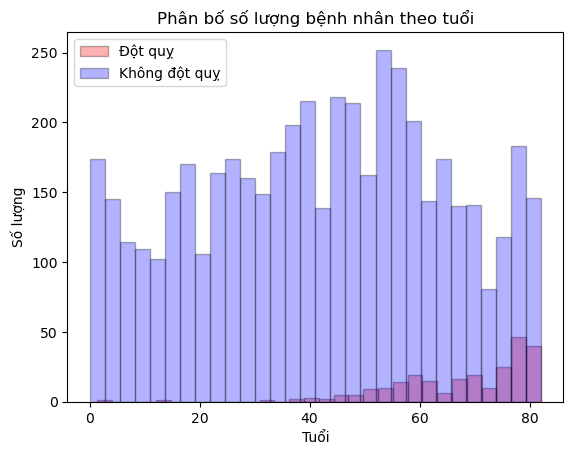

In [38]:
# Tính số lượng người bị đột quỵ theo từng tuổi
stroke = df[df['stroke'] == 1].groupby('age')['stroke'].count().reset_index(name='count')

# Tính số lượng người không bị đột quỵ theo từng tuổi
non_stroke = df[df['stroke'] == 0].groupby('age')['stroke'].count().reset_index(name='count')

# Các tham số dùng chung cho biểu đồ
kwargs = dict(
    histtype='bar',       # Loại biểu đồ là cột (bar)
    bins=30,              # Số lượng khoảng (bins) trên trục x
    edgecolor='black',    # Màu viền của các cột
    density=False,        # Không chuẩn hóa số liệu (dùng số lượng thực tế)
    alpha=0.3             # Độ trong suốt của các cột
)

# Vẽ biểu đồ phân bố tuổi cho nhóm bị đột quỵ
plt.hist(
    stroke['age'],               # Dữ liệu về tuổi của nhóm đột quỵ
    weights=stroke['count'],     # Số lượng bệnh nhân bị đột quỵ ở từng tuổi
    label='Đột quỵ',             # Nhãn hiển thị trong chú thích
    color='red',                 # Màu cột là màu đỏ
    **kwargs                     # Áp dụng các tham số chung
)

# Vẽ biểu đồ phân bố tuổi cho nhóm không bị đột quỵ
plt.hist(
    non_stroke['age'],           # Dữ liệu về tuổi của nhóm không bị đột quỵ
    weights=non_stroke['count'], # Số lượng bệnh nhân không bị đột quỵ ở từng tuổi
    label='Không đột quỵ',       # Nhãn hiển thị trong chú thích
    color='blue',                # Màu cột là màu xanh
    **kwargs                     # Áp dụng các tham số chung
)

# Thiết lập nhãn trục x và trục y
plt.xlabel('Tuổi')               # Nhãn trục x: Tuổi
plt.ylabel('Số lượng')           # Nhãn trục y: Số lượng

# Thiết lập tiêu đề cho biểu đồ
plt.title('Phân bố số lượng bệnh nhân theo tuổi')

plt.legend()

plt.show()


- Nguy cơ đột quỵ tăng dần theo tuổi. Nhóm người cao tuổi, đặc biệt trên 60 tuổi, là đối tượng cần chú trọng phòng ngừa và theo dõi nguy cơ.
- Ở những nhóm tuổi nhỏ, phần lớn dân số không có nguy cơ cao mắc đột quỵ.

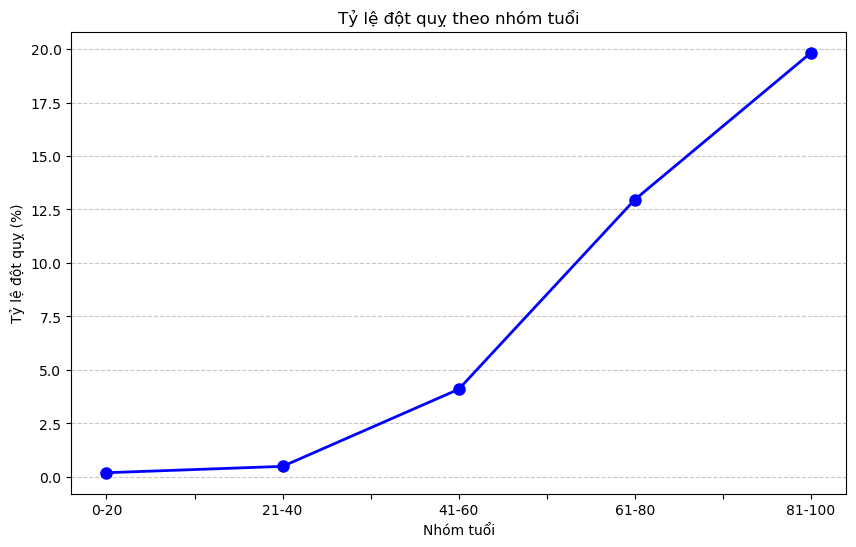

Độ tuổi trung bình bệnh nhân bị đột quỵ: 67.73 tuổi
Độ tuổi trung bình bệnh nhân không bị đột quỵ: 41.97 tuổi

Tỷ lệ độ quỵ theo từng độ tuổi


,Nhóm tuổi,Tỷ lệ đột quỵ
0,0-20,0.20%
1,21-40,0.49%
2,41-60,4.10%
3,61-80,12.96%
4,81-100,19.83%


In [39]:
# Tính độ tuổi trung bình của bệnh nhân bị và không bị đột quỵ
mean_age_stroke = df[df['stroke'] == 1]['age'].mean()  # Độ tuổi trung bình của bệnh nhân bị đột quỵ
mean_age_non_stroke = df[df['stroke'] == 0]['age'].mean()  # Độ tuổi trung bình của bệnh nhân không bị đột quỵ

# Tạo các nhóm tuổi để phân tích
age_bins = [0, 20, 40, 60, 80, 100]  # Các khoảng tuổi
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  # Nhãn cho các nhóm tuổi
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)  # Gán nhóm tuổi cho từng bệnh nhân

# Tính tỷ lệ đột quỵ theo từng nhóm tuổi
# - observed=False: Giữ lại tất cả các nhãn nhóm tuổi, kể cả khi không có dữ liệu
# - observed=True: Chỉ giữ lại các nhóm tuổi có dữ liệu
stroke_rate_by_age = df.groupby('age_group', observed=False)['stroke'].mean() * 100  # Tính tỷ lệ phần trăm đột quỵ theo nhóm tuổi

# Trực quan hóa tỷ lệ đột quỵ theo nhóm tuổi
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
stroke_rate_by_age.plot(
    kind='line',             # Kiểu biểu đồ đường
    marker='o',              # Kiểu đánh dấu các điểm
    linestyle='-',           # Kiểu đường nối
    color='blue',            # Màu đường
    linewidth=2,             # Độ dày đường
    markersize=8             # Kích thước điểm đánh dấu
)
plt.title('Tỷ lệ đột quỵ theo nhóm tuổi')  # Tiêu đề biểu đồ
plt.ylabel('Tỷ lệ đột quỵ (%)')           # Nhãn trục y
plt.xlabel('Nhóm tuổi')                   # Nhãn trục x

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Lưới trên trục y
plt.show()  # Hiển thị biểu đồ

# In kết quả độ tuổi trung bình
print(f'Độ tuổi trung bình bệnh nhân bị đột quỵ: {mean_age_stroke:.2f} tuổi')
print(f'Độ tuổi trung bình bệnh nhân không bị đột quỵ: {mean_age_non_stroke:.2f} tuổi')

# Hiển thị tỷ lệ đột quỵ theo từng nhóm tuổi dưới dạng bảng
print('\nTỷ lệ độ quỵ theo từng độ tuổi')
stroke_rate_by_age.reset_index(name='Tỷ lệ đột quỵ').rename(columns={'age_group': 'Nhóm tuổi'}).style.format({'Tỷ lệ đột quỵ': '{:.2f}%'})


**Phân tích**

- Tuổi trung bình của những người bị đột quỵ là 67.73 tuổi, cao hơn đáng kể so với nhóm không bị đột quỵ (41.97 tuổi).

- Tỷ lệ đột quỵ theo nhóm tuổi:
    - Tỷ lệ đột quỵ tăng dần theo nhóm tuổi:
      - 0–20 tuổi: 0.2%
      - 21–40 tuổi: 0.49%
      - 41–60 tuổi: 4.097%
      - 61–80 tuổi: 12.96%
      - 81–100 tuổi: 19.83%

**Kết luận**
- Nguy cơ đột quỵ tăng đáng kể ở các nhóm tuổi lớn hơn, đặc biệt từ 61 tuổi trở lên.
- Nhóm tuổi từ 81–100 có tỷ lệ đột quỵ cao nhất (19.83%), điều này cho thấy tuổi tác là một yếu tố nguy cơ mạnh đối với đột quỵ.

#### *Kiểm tra xem tỷ lệ đột quỵ có đồng biến với tuổi tác bằng mô hình học máy.


**Chuẩn bị dữ liệu**
- **Thêm hệ số chặn (`intercept`):** Hệ số này được thêm vào như một thành phần cố định của mô hình để tính xác suất cơ bản khi tất cả các biến độc lập bằng 0.
  - Lý do: Trong hồi quy logistic, intercept giúp mô hình dự đoán chính xác hơn ở giá trị gốc (baseline).

**Xác định biến độc lập và biến phụ thuộc**
- Biến độc lập (`age`): Tuổi của bệnh nhân.
- Biến phụ thuộc (`stroke`): Trạng thái đột quỵ, giá trị nhị phân:
  - `0`: Không bị đột quỵ.
  - `1`: Bị đột quỵ.

**Huấn luyện mô hình hồi quy logistic**
- Sử dụng thư viện **`statsmodels`** để xây dựng mô hình hồi quy logistic.
- Phương pháp: **Maximum Likelihood Estimation (MLE)**.
  - **MLE** tối ưu hóa hệ số hồi quy để mô hình phù hợp nhất với dữ liệu.

**Dự đoán**
- **Dự đoán xác suất (`predicted_stroke`):** Xác suất dự đoán bị đột quỵ cho mỗi cá nhân.
- **Dự đoán nhãn (`predicted_class`):** Gán nhãn dự đoán (0 hoặc 1) dựa trên ngưỡng mặc định là `0.5`.

**Các chỉ số đánh giá**
1. **Độ chính xác (Accuracy):**
   - Tỷ lệ dự đoán đúng trên tổng số quan sát.
   - Công thức:

  $$\text{Accuracy} = \frac{\text{Số dự đoán đúng}}{\text{Tổng số quan sát}}$$

2. **Ma trận nhầm lẫn (Confusion Matrix):**
   - Hiển thị số lượng các trường hợp sau:
     - **True Positive (TP):** Dự đoán đúng trường hợp bị đột quỵ.
     - **True Negative (TN):** Dự đoán đúng trường hợp không bị đột quỵ.
     - **False Positive (FP):** Sai sót dự đoán bị đột quỵ trong khi không bị.
     - **False Negative (FN):** Sai sót dự đoán không bị đột quỵ trong khi thực tế bị.

3. **AUC-ROC (Area Under Curve - Receiver Operating Characteristic):**
   - Đánh giá khả năng mô hình phân biệt giữa hai lớp (0 và 1).
   - **AUC** càng gần 1, mô hình càng tốt.

**Vẽ biểu đồ ROC**
- **Trục X (False Positive Rate - FPR):** Tỷ lệ trường hợp dương tính giả.
- **Trục Y (True Positive Rate - TPR):** Tỷ lệ trường hợp dương tính thật.
- **Đường ROC:** Minh họa hiệu suất phân loại của mô hình ở các ngưỡng khác nhau.
- **Đường chéo (Random Guess):** Đường chuẩn để so sánh, thể hiện dự đoán ngẫu nhiên.

**Hiển thị tóm tắt hồi quy**
- Tóm tắt các hệ số hồi quy và thông số quan trọng:
  - **Hệ số (`coef`):** Ảnh hưởng của biến độc lập lên log-odds.
  - **P-value:** Kiểm tra ý nghĩa thống kê của các biến.
  - **Pseudo R-squared:** Mức độ giải thích của mô hình.

**Đánh giá**
- **Kết quả chính:**
  1. **Accuracy:** Đo hiệu suất tổng thể của mô hình.
  2. **ROC AUC:** Đánh giá khả năng phân loại giữa lớp 0 và lớp 1.
  3. **Confusion Matrix:** Phân tích chi tiết hiệu suất dự đoán.

- **Ý nghĩa của hệ số:**
  - **Tuổi:** Mỗi năm tuổi tăng, xác suất bị đột quỵ tăng đáng kể.
  - **Intercept:** Giá trị cơ bản của log-odds khi tất cả biến độc lập bằng 0.

<!-- ---

**Kết luận**
1. **Hiệu suất tổng thể:**
   - Mô hình có độ chính xác cao.
   - AUC = 0.8345 cho thấy mô hình tốt trong việc phân biệt giữa hai lớp.

2. **Hạn chế:**
   - Mất cân bằng dữ liệu: Mô hình chưa phát hiện tốt các trường hợp đột quỵ (False Negative cao).
   - Cần cải thiện bằng cách cân bằng dữ liệu hoặc thêm biến độc lập.

3. **Tầm quan trọng của tuổi:**
   - Tuổi là yếu tố có ý nghĩa thống kê cao, tác động đáng kể đến nguy cơ bị đột quỵ. -->

Optimization terminated successfully.
         Current function value: 0.158146
         Iterations 9


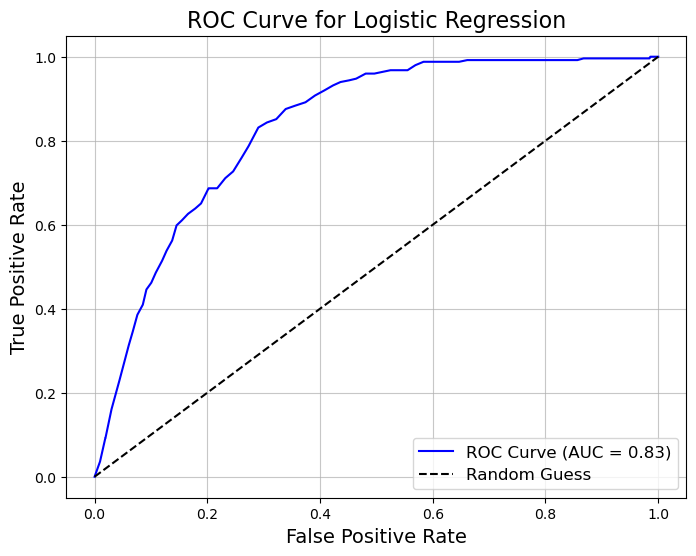

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5108
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Dec 2024   Pseudo R-squ.:                  0.1880
Time:                        21:03:41   Log-Likelihood:                -808.13
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 2.376e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0747      0.005     15.181      0.000       0.065       0.084
intercept     -7.2314      0.335    -21.587      0.000      -7.888      -6.575


,Value
Accuracy,0.951272
ROC AUC,0.834541
Confusion Matrix,"[[4861, 0], [249, 0]]"


In [40]:
# Thêm hệ số chặn (intercept) cho mô hình hồi quy logistic
# Trong hồi quy logistic, hệ số chặn giúp mô hình tính xác suất cơ bản (baseline probability) khi tất cả các biến độc lập bằng 0.
df['intercept'] = 1

# Xác định biến độc lập (independent variables) và biến phụ thuộc (dependent variable)
# - Biến độc lập: Tuổi (`age`) và hệ số chặn (`intercept`).
# - Biến phụ thuộc: Tình trạng đột quỵ (`stroke`), là biến nhị phân (0: Không bị, 1: Bị).
X = df[['age', 'intercept']]  # Biến độc lập
y = df['stroke']  # Biến phụ thuộc

# Khởi tạo và huấn luyện mô hình hồi quy logistic
logit_model = sm.Logit(y, X)  # Sử dụng thư viện statsmodels để tạo mô hình hồi quy logistic
result = logit_model.fit()  # Huấn luyện mô hình bằng Maximum Likelihood Estimation (MLE)

# Dự đoán xác suất và phân loại
# - `predicted_stroke`: Xác suất dự đoán xảy ra đột quỵ (P(y=1)).
# - `predicted_class`: Dự đoán nhãn (0 hoặc 1) dựa trên ngưỡng mặc định 0.5.
df['predicted_stroke'] = result.predict(X)
df['predicted_class'] = (df['predicted_stroke'] >= 0.5).astype(int)

# Đánh giá hiệu suất mô hình
# - Độ chính xác (Accuracy): Tỷ lệ dự đoán đúng trên tổng số quan sát.
accuracy = accuracy_score(df['stroke'], df['predicted_class'])

# - Ma trận nhầm lẫn (Confusion Matrix): Hiển thị số lượng True Positive, True Negative, False Positive, và False Negative.
conf_matrix = confusion_matrix(df['stroke'], df['predicted_class'])

# - AUC-ROC (Area Under Curve - Receiver Operating Characteristic): Đo khả năng phân biệt giữa hai lớp (0 và 1).
roc_auc = roc_auc_score(df['stroke'], df['predicted_stroke'])

# Vẽ biểu đồ ROC (Receiver Operating Characteristic)
# - Trục X: Tỷ lệ dương tính giả (False Positive Rate - FPR).
# - Trục Y: Tỷ lệ dương tính thật (True Positive Rate - TPR).
# - Đường chéo (Random Guess): Hiệu suất của mô hình đoán ngẫu nhiên.
fpr, tpr, _ = roc_curve(df['stroke'], df['predicted_stroke'])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')  # Đường cong ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Đường chéo ngẫu nhiên
plt.title('ROC Curve for Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.7)
plt.show()

# Hiển thị tóm tắt hồi quy logistic
logit_summary = result.summary()

# Hiển thị các chỉ số đánh giá hiệu suất mô hình
evaluation_results = {
    "Accuracy": accuracy,  # Độ chính xác của mô hình
    "ROC AUC": roc_auc,  # Giá trị AUC (càng gần 1 càng tốt)
    "Confusion Matrix": conf_matrix,  # Ma trận nhầm lẫn
}

print(logit_summary)

# Chuyển thành dataframe để xuất đẹp hơn
evaluation_results_df = pd.DataFrame.from_dict(evaluation_results, orient='index', columns=['Value'])
display(evaluation_results_df)


### **Phân tích**


#### **1. Kết quả từ hồi quy logistic**
- **Mô hình:** Logistic Regression
- **Phương pháp:** Maximum Likelihood Estimation (MLE)
- **Số quan sát:** 5110
- **Log-Likelihood:** -808.13
- **Pseudo R-squared:** 0.1880 (Mức độ giải thích của mô hình: 18.8%)
- **LLR p-value:** $2.376 . 10^{-83}$ (rất nhỏ, mô hình có ý nghĩa tổng thể)

#### **2. Phân tích hệ số hồi quy**

| **Biến**| **Hệ số (Coef)** | **P-value** | **95% CI (Khoảng tin cậy)** | **Ý nghĩa**|
|---------|-----------------|-------------|-----------------------------|-------|
| **age** | 0.0747 | 0.000 | [0.065, 0.084] | Tuổi tăng 1 năm, log-odds tăng 0.0747.|
| **intercept** | -7.2314 | 0.000| [-7.888, -6.575]| Log-odds cơ bản khi tuổi bằng 0.|

- **Giải thích hệ số:**
  - **Tuổi (`age`):**
    - Hệ số hồi quy \(0.0747\): Khi tuổi tăng thêm 1 năm, log-odds của xác suất bị đột quỵ tăng 0.0747.
    - Chuyển sang Odds Ratio: $e^{0.0747} ≈ 1.078$ , tức là mỗi năm tuổi tăng, khả năng bị đột quỵ tăng 7.8%.
  - **Hệ số chặn (`intercept`):**
    - Hệ số \(-7.2314\): Giá trị log-odds cơ bản khi tuổi bằng 0. Không có ý nghĩa thực tế do tuổi = 0 không phù hợp.


#### **3. Đánh giá mô hình**

##### **3.1. Ma trận nhầm lẫn (Confusion Matrix)**

\begin{bmatrix}
\text{4861} & \text{0} \\
\text{249} & \text{0}
\end{bmatrix}


- **True Negative (4861):** Mô hình dự đoán chính xác rằng không bị đột quỵ.
- **True Positive (0):** Mô hình không dự đoán đúng trường hợp bị đột quỵ.
- **False Negative (249):** Mô hình dự đoán sai rằng không bị đột quỵ khi thực tế bị.
- **False Positive (0):** Không có dự đoán nhầm rằng bị đột quỵ.

##### **3.2. Độ chính xác (Accuracy)**

$$\text{Accuracy} = \frac{\text{4861}}{\text{5110}} \approx 95.13\%$$

- Mô hình có độ chính xác tổng thể cao, nhưng điều này chủ yếu do lớp không bị đột quỵ chiếm ưu thế (mất cân bằng dữ liệu).

##### **3.3. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**
- **ROC AUC = 0.8345**: Mô hình có khả năng phân biệt giữa hai lớp tốt (trên mức trung bình, gần với ngưỡng rất tốt).


#### **4. Nhận xét và vấn đề**

1. **Hiệu suất tổng thể (Accuracy):**
   - Độ chính xác cao (95.13%), nhưng chủ yếu là do mô hình tập trung dự đoán đúng lớp không bị đột quỵ (lớp 0).

2. **Mất cân bằng dữ liệu:**
   - Ma trận nhầm lẫn cho thấy mô hình không phát hiện được trường hợp đột quỵ (lớp 1). Điều này là do số lượng mẫu lớp 1 quá nhỏ so với lớp 0.

3. **Giá trị ROC AUC:**
   - AUC = 0.8345 cho thấy mô hình có khả năng phân biệt tốt giữa lớp 0 và lớp 1 nếu điều chỉnh ngưỡng phân loại hoặc cân bằng dữ liệu.


#### **Kết luận**
- **Tuổi** là một yếu tố quan trọng ảnh hưởng đến nguy cơ đột quỵ: mỗi năm tuổi tăng làm tăng nguy cơ đột quỵ thêm 7.8%.
- **Mất cân bằng dữ liệu** gây hạn chế cho mô hình trong việc dự đoán đúng các trường hợp bị đột quỵ.
- **Hiệu suất tổng thể** của mô hình tốt (AUC = 0.8345), nhưng cần cải thiện khả năng phát hiện lớp bị đột quỵ.


### Bước 2: Tương tác giữa tuổi và các yếu tố nguy cơ

Tuổi tác có ảnh hưởng như thế nào đến tác động của các yếu tố nguy cơ như tăng huyết áp, bệnh tim, chỉ số BMI hoặc tình trạng hút thuốc đối với nguy cơ đột quỵ?

In [41]:
# Categorizing BMI levels
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf],
                              labels=['Dưới chuẩn', 'Bình thường', 'Thừa cân', 'Béo phì'], right=False)

In [42]:
# Hàm phân tích mối tương tác giữa nhóm tuổi và các yếu tố nguy cơ
def analyze_interaction(data, risk_factor):
    """
    Hàm phân tích mối quan hệ giữa nhóm tuổi và một yếu tố nguy cơ (risk_factor) đối với nguy cơ đột quỵ.

    Args:
    - data (DataFrame): Dữ liệu cần phân tích.
    - risk_factor (str): Tên cột đại diện cho yếu tố nguy cơ.

    Returns:
    - DataFrame: Tỷ lệ đột quỵ (%) cho từng nhóm tuổi và trạng thái của yếu tố nguy cơ.
    """
    # Tính tỷ lệ đột quỵ (%) theo nhóm tuổi và trạng thái của yếu tố nguy cơ
    grouped = (data.groupby(['age_group', risk_factor], observed=False)['stroke'].mean() * 100).unstack()

    # Nếu cột trạng thái chứa giá trị 0 và 1, đổi tên thành "Không" và "Có" cho dễ hiểu
    if set(grouped.columns) == {0, 1}:
        grouped.columns = ['Không', 'Có']

    # Đặt lại chỉ mục và đổi tên cột "age_group" thành "Nhóm tuổi"
    return grouped.reset_index().rename(columns={'age_group': 'Nhóm tuổi'})

# Phân tích mối tương tác giữa nhóm tuổi và bệnh tăng huyết áp
hypertension_effect = analyze_interaction(df, 'hypertension')

# Phân tích mối tương tác giữa nhóm tuổi và bệnh tim
heart_disease_effect = analyze_interaction(df, 'heart_disease')

# Phân tích mối tương tác giữa nhóm tuổi và chỉ số BMI
bmi_effect = analyze_interaction(df, 'bmi_category')

# Phân tích mối tương tác giữa nhóm tuổi và tình trạng hút thuốc
smoking_effect = analyze_interaction(df, 'smoking_status').rename(
    columns={'Unknown': 'Không xác định',
             'formerly smoked': 'Đã từng hút',
             'never smoked': 'Chưa bao giờ hút',
             'smokes': 'Có hút'})

# Hiển thị kết quả phân tích

# Tăng huyết áp
print("Tỷ lệ độ quỵ qua tương tác giữa tuổi và tăng huyết áp:")
display(hypertension_effect)

# Bệnh tim
print("\nTỷ lệ độ quỵ qua tương tác giữa tuổi và bệnh tim:")
display(heart_disease_effect)

# Chỉ số BMI
print("\nTỷ lệ độ quỵ qua tương tác giữa tuổi và chỉ số BMI:")
bmi_effect.columns.name = None  # Xóa tên index cột trong DataFrame
display(bmi_effect)

# Tình trạng hút thuốc
print("\nTỷ lệ độ quỵ qua tương tác giữa tuổi và tình trạng hút thuốc:")
smoking_effect.columns.name = None  # Xóa tên index cột trong DataFrame
display(smoking_effect)


Tỷ lệ độ quỵ qua tương tác giữa tuổi và tăng huyết áp:


,Nhóm tuổi,Không,Có
0,0-20,0.195503,0.000000
1,21-40,0.424088,2.500000
2,41-60,3.674352,7.471264
3,61-80,11.550802,18.181818
4,81-100,19.540230,20.689655



Tỷ lệ độ quỵ qua tương tác giữa tuổi và bệnh tim:


,Nhóm tuổi,Không,Có
0,0-20,0.195312,0.000000
1,21-40,0.493016,0.000000
2,41-60,3.935957,7.936508
3,61-80,11.840796,19.125683
4,81-100,17.977528,25.925926



Tỷ lệ độ quỵ qua tương tác giữa tuổi và chỉ số BMI:


,Nhóm tuổi,Dưới chuẩn,Bình thường,Thừa cân,Béo phì
0,0-20,0.000000,0.000000,0.000000,0.961538
1,21-40,0.000000,0.312500,0.558659,0.403226
2,41-60,0.000000,1.250000,3.485839,4.732254
3,61-80,0.000000,15.168539,9.900990,11.067194
4,81-100,33.333333,15.384615,28.571429,10.810811



Tỷ lệ độ quỵ qua tương tác giữa tuổi và tình trạng hút thuốc:


,Nhóm tuổi,Không xác định,Đã từng hút,Chưa bao giờ hút,Có hút
0,0-20,0.268456,0.000000,0.000000,0.000000
1,21-40,0.000000,1.226994,0.185529,1.132075
2,41-60,4.605263,4.444444,3.049759,5.312500
3,61-80,12.669683,14.202899,12.663755,11.585366
4,81-100,13.636364,16.129032,23.076923,27.272727


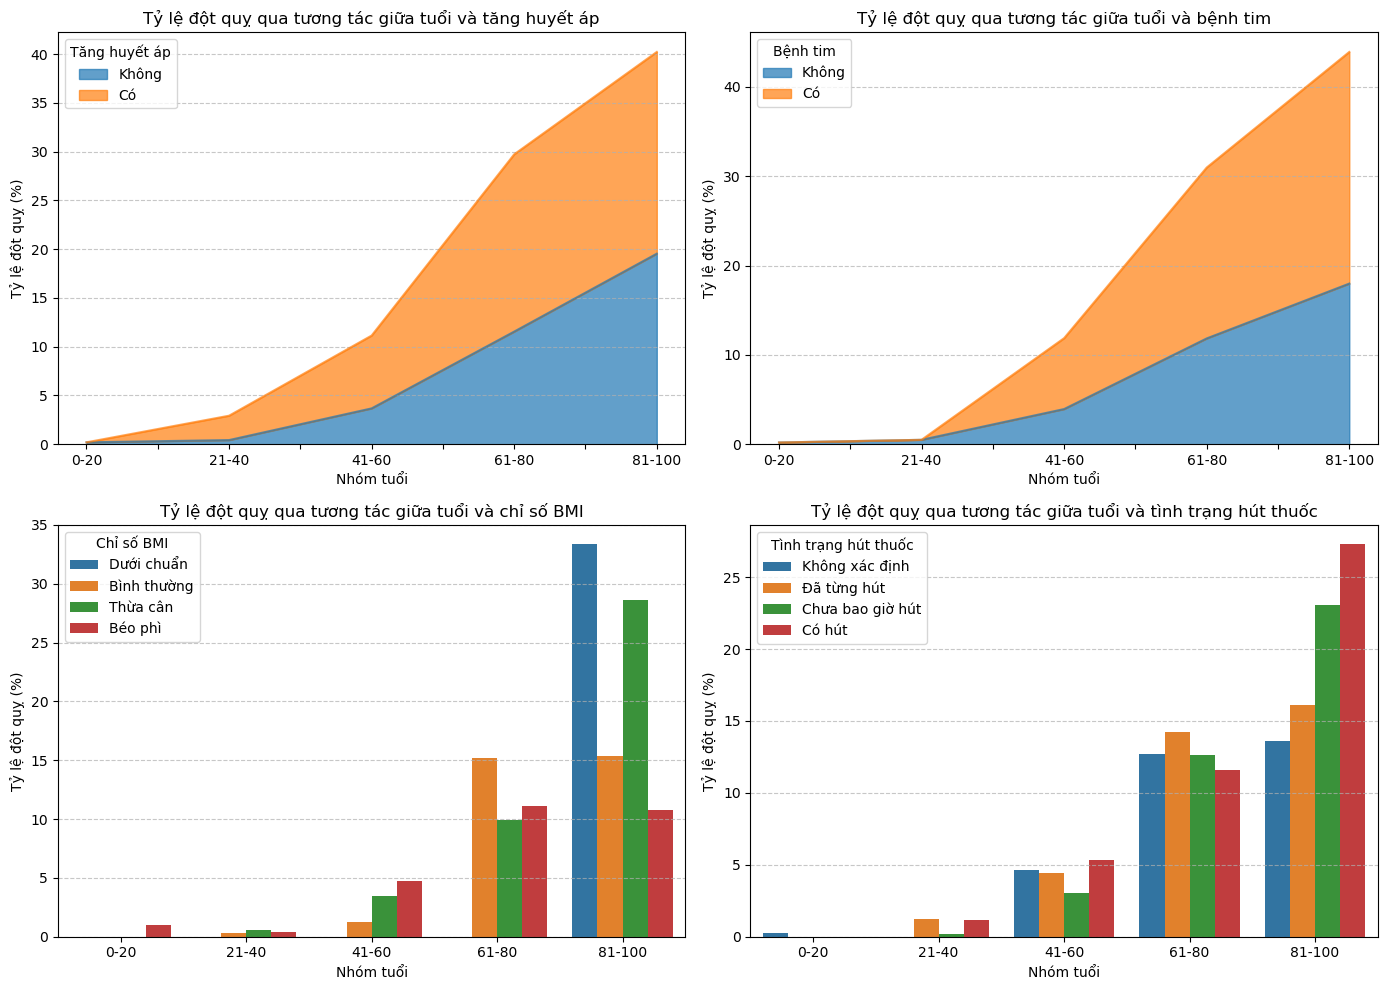

In [43]:
# Biểu đồ miền không cần chuyển dữ liệu sang dạng dài, chỉ hoạt động trực tiếp trên dữ liệu dạng rộng.

# Thiết lập khung biểu đồ (2 hàng x 2 cột) với kích thước 14x10
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Biểu đồ miền: Tăng huyết áp
# Dữ liệu được thiết lập theo dạng rộng, chuyển chỉ số 'Nhóm tuổi' thành index.
hypertension_effect_area = hypertension_effect.set_index('Nhóm tuổi')
hypertension_effect_area.plot(kind='area', stacked=True, alpha=0.7, ax=axes[0, 0])  # Biểu đồ miền dạng stacked
axes[0, 0].set_title('Tỷ lệ đột quỵ qua tương tác giữa tuổi và tăng huyết áp')  # Tiêu đề biểu đồ
axes[0, 0].set_xlabel('Nhóm tuổi')  # Nhãn trục x
axes[0, 0].set_ylabel('Tỷ lệ đột quỵ (%)')  # Nhãn trục y
axes[0, 0].legend(title='Tăng huyết áp')  # Chú thích (legend)
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới cho trục y để dễ so sánh

# 2. Biểu đồ miền: Bệnh tim
heart_disease_effect_area = heart_disease_effect.set_index('Nhóm tuổi')
heart_disease_effect_area.plot(kind='area', stacked=True, alpha=0.7, ax=axes[0, 1])  # Biểu đồ miền dạng stacked
axes[0, 1].set_title('Tỷ lệ đột quỵ qua tương tác giữa tuổi và bệnh tim')  # Tiêu đề biểu đồ
axes[0, 1].set_xlabel('Nhóm tuổi')  # Nhãn trục x
axes[0, 1].set_ylabel('Tỷ lệ đột quỵ (%)')  # Nhãn trục y
axes[0, 1].legend(title='Bệnh tim')  # Chú thích (legend)
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới cho trục y để dễ so sánh

# 3. Biểu đồ cột: Chỉ số BMI (Dữ liệu chuyển sang dạng dài bằng melt)
# Chuyển đổi dữ liệu dạng rộng thành dạng dài để dễ vẽ với Seaborn.
bmi_effect_melted = bmi_effect.melt(id_vars='Nhóm tuổi', var_name='Chỉ số BMI', value_name='Tỷ lệ đột quỵ')
sns.barplot(data=bmi_effect_melted, x='Nhóm tuổi', y='Tỷ lệ đột quỵ', hue='Chỉ số BMI', ax=axes[1, 0])  # Vẽ biểu đồ cột
axes[1, 0].set_title('Tỷ lệ đột quỵ qua tương tác giữa tuổi và chỉ số BMI')  # Tiêu đề biểu đồ
axes[1, 0].set_xlabel('Nhóm tuổi')  # Nhãn trục x
axes[1, 0].set_ylabel('Tỷ lệ đột quỵ (%)')  # Nhãn trục y
axes[1, 0].legend(title='Chỉ số BMI', loc='upper left')  # Chú thích (legend)
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới cho trục y để dễ so sánh

# 4. Biểu đồ cột: Tình trạng hút thuốc (Dữ liệu chuyển sang dạng dài bằng melt)
# Chuyển đổi dữ liệu dạng rộng thành dạng dài để dễ vẽ với Seaborn.
smoking_effect_melted = smoking_effect.melt(id_vars='Nhóm tuổi', var_name='Tình trạng hút thuốc', value_name='Tỷ lệ đột quỵ')
sns.barplot(data=smoking_effect_melted, x='Nhóm tuổi', y='Tỷ lệ đột quỵ', hue='Tình trạng hút thuốc', ax=axes[1, 1])  # Vẽ biểu đồ cột
axes[1, 1].set_title('Tỷ lệ đột quỵ qua tương tác giữa tuổi và tình trạng hút thuốc')  # Tiêu đề biểu đồ
axes[1, 1].set_xlabel('Nhóm tuổi')  # Nhãn trục x
axes[1, 1].set_ylabel('Tỷ lệ đột quỵ (%)')  # Nhãn trục y
axes[1, 1].legend(title='Tình trạng hút thuốc', loc='upper left')  # Chú thích (legend)
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới cho trục y để dễ so sánh

# Căn chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### **Phân tích**
**1. Tăng huyết áp**
- Ở các nhóm tuổi, người bị bệnh tăng huyết áp có nguy cơ bị đột quỵ cao hơn người bình thường
- Từ 0 đến 20: Tỷ lệ bị đột quỵ của nhóm người không bị tăng huyết áp là khoảng 0.2%. Trong khi đó tỷ lệ này ở nhóm người còn lại là khoảng 0%
- Từ 21 đến 40: Tỷ lệ đột quỵ của nhóm có tăng huyết áp (2.5%) cao hơn gần 6 lần so với nhóm không tăng huyết áp (0.42%)
- Từ 41 đến 60: Tỷ lệ đột quỵ giữa nhóm người bị bệnh tăng huyết áp và nhóm người còn lại lần lượt là 7.4% và 3.7%
- Từ 61 đến 80: Tỷ lệ đột quỵ của nhóm bị bệnh tăng huyết áp là 18.18% còn tỷ lệ của nhóm không bị tăng huyết áp là 11.55%
- Từ 81 đến 100: khoảng cách chênh lệch giữa hai nhóm không quá khác biệt. Tỷ lệ của nhóm mắc bệnh tăng huyết áp và nhóm không mắc bệnh lần lượt là 20.69% và 19.54%

**Nhận xét**
- Tăng huyết áp có tác động đến nguy cơ đột quỵ theo từng nhóm tuổi. Những người mắc bệnh này có tỷ lệ đột quỵ cao hơn nhóm còn lại.
- Ở nhóm tuổi từ 0 đến 20, tỷ lệ ở nhóm người không bị tăng huyết áp là 0.2% trong khi tỷ lệ này ở nhóm mắc bệnh tăng huyết áp hầu như không có. Chứng tỏ ở độ tuổi này, việc có bị tăng huyết áp hay không sẽ không ảnh hưởng tới nguy cơ đột quỵ
- Đặc biệt ở nhóm tuổi từ 21 đến 40, mức chênh lệch giữa 2 nhóm mắc bệnh và không mắc bệnh là cao nhất (chênh lệch gần 6 lần). Chứng tỏ rằng, ở một mức tuổi chưa quá già, khi chưa bị các vấn đề lão hóa ảnh hướng nặng nề, thì tác động của bệnh tăng huyết áp đến tỷ lệ bị đột quỵ là khá lớn.

**2. Bệnh tim**
- Từ 0 đến 20 tuổi và từ 21 đến 40 tuổi, tỷ lệ đột quỵ ở nhóm người không bị mắc bệnh tim lần lượt là khoảng 0.2% và 0.5%. Trong khi ở nhóm có mắc bệnh thì tỷ lệ này gần như bằng 0%
- Từ 41 đến 60 tuổi, tỷ lệ đột quỵ ở nhóm người mắc bệnh và không mắc bệnh lần lượt là 7.9% và 3.9%
- Từ 61 đến 80 tuổi, tỷ lệ đột quỵ có sự chênh lệch đáng kể giữa 2 nhóm người. Ở nhóm bị mắc bệnh tim là 19.13% trong khi ở nhóm còn lại là 11.84%
- Từ 81 đến 100 tuổi, tỷ lệ đột quỵ ở nhóm người mắc bệnh và nhóm người không mắc bệnh lần lượt là: 25.93% và 17.98%

**Nhận xét**
- Bệnh tim làm tăng nguy cơ đột quỵ đáng kể, đặc biệt ở nhóm tuổi trên 60.
- Ở người trẻ, bệnh tim không phải là yếu tố nguy cơ lớn như ở người cao tuổi. Bệnh tim có thể không phải là nguyên nhân gây đột quỵ ở người trẻ

**3. Chỉ số BMI**
- Ở nhóm 0-20 tuổi, chỉ duy nhất nhóm "Béo phì" có tỷ lệ đột quỵ khoảng 0.96% trong khi ở các nhóm khác, tỷ lệ này gần như bằng 0%
- Ở nhóm 21-40 tuổi, Tỷ lệ đột quỵ tăng dần theo mức độ chỉ số BMI ("Dưới chuẩn", "Bình thường", "Thừa cân") nhưng lại giảm khi đến nhóm "Béo phì". Tỷ lệ này lần lượt là khoảng 0%, 0.31%, 0.56% và 0.4%
- Ở nhóm 41–60 tuổi, tỷ lệ đột quỵ cao nhất ở nhóm "Béo phì" (4.73%), so với nhóm "Thừa cân" (3.49%) và "Bình thường" (1.25%).
- Ở nhóm 61–80 tuổi, nhóm "Béo phì" có tỷ lệ đột quỵ (11.07%) cao hơn nhóm "Bình thường" (15.17%), nhưng gần bằng nhóm "Thừa cân" (9.90%).
- Ở nhóm 81–100 tuổi, nhóm "Dưới chuẩn" bất ngờ có tỷ lệ đột quỵ cao nhất (33.33%), có thể do các bệnh lý nền hoặc sức khỏe kém.

**Nhận xét**
- BMI ảnh hưởng mạnh đến nguy cơ đột quỵ, với nhóm "Béo phì" thường có nguy cơ cao hơn các nhóm khác ở mọi nhóm tuôi.
- Ở nhóm tuổi cao (trên 80), yếu tố dinh dưỡng kém (nhóm "Dưới chuẩn") có thể làm tăng nguy cơ đột quỵ do các bệnh lý liên quan.


**4. Tình trạng hút thuốc**
- Ở nhóm 0–20 tuổi, tình trạng hút thuốc không có tác động rõ rệt (tỷ lệ đột quỵ gần 0 ở mọi nhóm).
- Ở nhóm 21–40 tuổi, tỷ lệ đột quỵ cao nhất ở người "Đã từng hút" (1.23%) và "Có hút" (1.13%), trong khi nhóm "Chưa bao giờ hút" là 0.19%.
- Ở nhóm 41–60 tuổi, tỷ lệ đột quỵ tăng mạnh, cao nhất ở người "Có hút" (5.31%), so với nhóm "Chưa bao giờ hút" (3.05%).
- Ở nhóm 61–80 tuổi, tỷ lệ đột quỵ khá cao ở nhóm "Đã từng hút" (14.2%) và ngạc nhiên thấp nhất là ở nhóm "Có hút" (11.59%)
- Ở nhóm 81–100 tuổi, nhóm "Có hút" có tỷ lệ đột quỵ cao nhất (27.27%).

**Nhận xét**
- Hút thuốc làm tăng nguy cơ đột quỵ rõ rệt, đặc biệt ở người lớn tuổi (trên 41 tuổi)

#### **3. Đặc điểm của những trường hợp đột quỵ trẻ tuổi**
- Những người bị đột quỵ ở độ tuổi trẻ (dưới 40 tuổi) có đặc điểm gì đặc biệt (ví dụ: tình trạng sức khỏe, lối sống)?
- Có yếu tố nguy cơ nào nổi bật ở nhóm đột quỵ sớm so với nhóm đột quỵ ở người già không?
* Lưu ý:
  - Những người nhỏ hơn 40 tuổi là trẻ
  - Những người nhỏ hơn 40 tuổi là già

In [44]:
# Lọc dữ liệu theo các nhóm:
# 1. Người trẻ không bị đột quỵ (<40 tuổi).
# 2. Người trẻ bị đột quỵ (<40 tuổi).
# 3. Người già bị đột quỵ (>=40 tuổi).
young_without_stroke = df[(df['stroke'] == 0) & (df['age'] < 40)]
young_stroke = df[(df['stroke'] == 1) & (df['age'] < 40)]
old_stroke = df[(df['stroke'] == 1) & (df['age'] >= 40)]

# Hàm để tóm tắt đặc điểm sức khỏe và lối sống của từng nhóm
def summarize_group(data, group_name):
    """
    Hàm tính toán và trả về các chỉ số sức khỏe và lối sống của một nhóm.

    Args:
    - data (DataFrame): Dữ liệu của nhóm cần phân tích.
    - group_name (str): Tên của nhóm (ví dụ: "Young Non-Stroke").

    Returns:
    - DataFrame: Một hàng dữ liệu chứa các chỉ số của nhóm.
    """
    summary = {
        "Tỷ lệ bị cao huyết áp (%)": data['hypertension'].mean() * 100,  # Tính tỷ lệ cao huyết áp (%).
        "Tỷ lệ bị bệnh tim (%)": data['heart_disease'].mean() * 100,  # Tính tỷ lệ bệnh tim (%).
        "BMI trung bình": data['bmi'].mean(),  # Tính chỉ số BMI trung bình.
        "Tỷ lệ đã từng hút thuốc (%)": (data['smoking_status'] == 'formerly smoked').mean() * 100,  # Tính tỷ lệ đã từng hút thuốc (%).
        "Tỷ lệ chưa từng hút thuốc (%)": (data['smoking_status'] == 'never smoked').mean() * 100,  # Tính tỷ lệ chưa từng hút thuốc (%).
        "Tỷ lệ có hút thuốc (%)": (data['smoking_status'] == 'smokes').mean() * 100,  # Tính tỷ lệ hiện tại đang hút thuốc (%).
    }
    return pd.DataFrame(summary, index=[group_name])  # Trả về kết quả dưới dạng DataFrame.

# Tóm tắt đặc điểm sức khỏe và lối sống của từng nhóm
young_without_stroke_summary = summarize_group(young_without_stroke, "Young Non-Stroke")  # Người trẻ không bị đột quỵ.
young_stroke_summary = summarize_group(young_stroke, "Young Stroke")  # Người trẻ bị đột quỵ.
old_summary = summarize_group(old_stroke, "Old Stroke")  # Người già bị đột quỵ.

# Kết hợp các bảng tóm tắt của từng nhóm thành một bảng tổng hợp
comparison = pd.concat([young_without_stroke_summary, young_stroke_summary, old_summary])

# Hiển thị kết quả
comparison


,Tỷ lệ bị cao huyết áp (%),Tỷ lệ bị bệnh tim (%),BMI trung bình,Tỷ lệ đã từng hút thuốc (%),Tỷ lệ chưa từng hút thuốc (%),Tỷ lệ có hút thuốc (%)
Young Non-Stroke,1.665125,0.138760,26.289279,8.325624,33.765032,12.580944
Young Stroke,12.500000,0.000000,29.983333,25.000000,12.500000,37.500000
Old Stroke,26.970954,19.502075,30.485714,28.215768,36.929461,16.182573


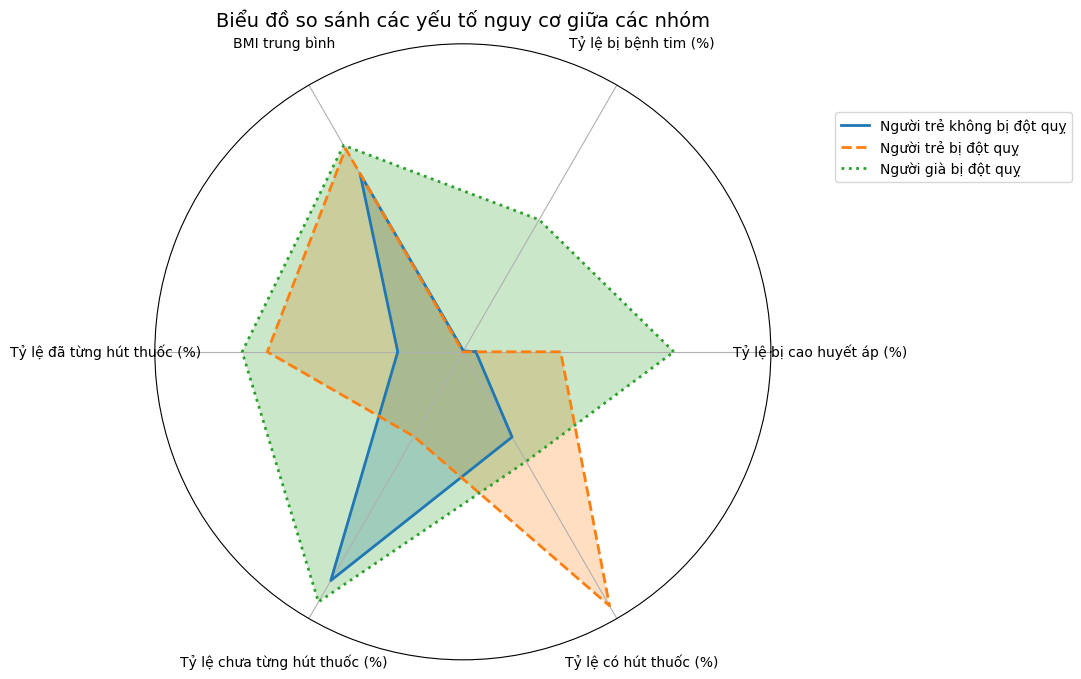

In [45]:
# Chuẩn bị dữ liệu cho biểu đồ radar
categories = comparison.columns  # Lấy danh sách các danh mục (các trục của biểu đồ)
num_vars = len(categories)  # Số lượng danh mục

# Chuẩn bị giá trị cho các nhóm
values_young_non_stroke = comparison.loc["Young Non-Stroke"].values.tolist()  # Giá trị nhóm "Young Non-Stroke"
values_young_stroke = comparison.loc["Young Stroke"].values.tolist()  # Giá trị nhóm "Young Stroke"
values_old_stroke = comparison.loc["Old Stroke"].values.tolist()  # Giá trị nhóm "Old Stroke"

'''
Trong biểu đồ radar, cần "đóng vòng" để giá trị cuối cùng kết nối lại với giá trị đầu tiên.
Điều này đảm bảo biểu đồ sẽ khép kín, tạo hình tròn hoàn chỉnh.
'''
# Thêm giá trị đầu tiên vào cuối danh sách
values_young_non_stroke += values_young_non_stroke[:1]
values_young_stroke += values_young_stroke[:1]
values_old_stroke += values_old_stroke[:1]

# Thiết lập góc cho các trục
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Đóng vòng (thêm góc đầu tiên vào cuối)

# Khởi tạo biểu đồ radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))  # Kích thước lớn hơn (8x8) để dễ đọc hơn

# Vẽ từng nhóm lên biểu đồ radar
ax.plot(angles, values_young_non_stroke, label="Người trẻ không bị đột quỵ", linewidth=2, linestyle='solid')
ax.fill(angles, values_young_non_stroke, alpha=0.25)  # Đổ màu cho vùng

ax.plot(angles, values_young_stroke, label="Người trẻ bị đột quỵ", linewidth=2, linestyle='dashed')
ax.fill(angles, values_young_stroke, alpha=0.25)

ax.plot(angles, values_old_stroke, label="Người già bị đột quỵ", linewidth=2, linestyle='dotted')
ax.fill(angles, values_old_stroke, alpha=0.25)

# Thêm nhãn cho từng trục
ax.set_yticks([])  # Ẩn các nhãn ở trục y
ax.set_xticks(angles[:-1])  # Thêm nhãn cho trục x
ax.set_xticklabels(categories, fontsize=10, rotation=30, ha='center')  # Xoay nhãn 30 độ để tránh bị đè, căn giữa
ax.tick_params(pad=25)  # Tăng khoảng cách giữa nhãn và biểu đồ

# Thêm tiêu đề và chú thích
plt.title("Biểu đồ so sánh các yếu tố nguy cơ giữa các nhóm", size=14, position=(0.5, 1.2))  # Căn chỉnh tiêu đề
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 0.9))  # Chỉnh vị trí của chú thích (legend)

# Hiển thị biểu đồ
plt.show()


#### **Phân tích**
**1. Những người bị đột quỵ ở độ tuổi trẻ (dưới 40 tuổi) có đặc điểm gì đặc biệt ?**

  Đặc điểm nổi bật của nhóm bị đột quỵ (Young Stroke):
  - Tăng huyết áp cao: Tỷ lệ cao huyết áp là 12.5%, cao hơn đáng kể so với nhóm không đột quỵ (1.67%). Điều này cho thấy tăng huyết áp là một yếu tố nguy cơ lớn ở người trẻ bị đột quỵ.
  - BMI cao: BMI trung bình là 29.98, gần ngưỡng béo phì (≥30). Điều này cho thấy thừa cân/béo phì cũng là yếu tố đáng chú ý.
  - Hút thuốc: Tỷ lệ đang hút thuốc (37.5%) và đã từng hút thuốc (25%) cao hơn rõ rệt so với nhóm không đột quỵ.

**Kết luận**:

  Người trẻ bị đột quỵ thường có:
  - Tăng huyết áp cao.
  - BMI cao (gần béo phì).
  - Đang hoặc đã từng hút thuốc

**2. Có yếu tố nguy cơ nào nổi bật ở nhóm đột quỵ sớm so với nhóm đột quỵ ở người già?**

  Người trẻ bị đột quỵ:
  - Tăng huyết áp và hút thuốc: Là các yếu tố nổi bật nhất.
  - Hút thuốc hiện tại (37.5%) cao hơn nhiều so với nhóm người già bị đột quỵ.

  Người già bị đột quỵ:
    - Cao huyết áp và bệnh tim: Là các yếu tố nguy cơ chính.
    - Tỷ lệ bị bệnh tim (19.5%) cho thấy đây là yếu tố nguy cơ lớn nhất ở người già.

**Kết luận**

  - Ở người trẻ: Hút thuốc và BMI cao là yếu tố nổi bật.
  - Ở người già: Tăng huyết áp và bệnh tim là yếu tố nguy cơ chính.


#### **4. So sánh giới tính và tuổi trong đột quỵ**
- Mối quan hệ giữa tuổi tác và đột quỵ có khác nhau giữa nam và nữ không?
- Ở độ tuổi nào, sự khác biệt giới tính về nguy cơ đột quỵ rõ rệt nhất?

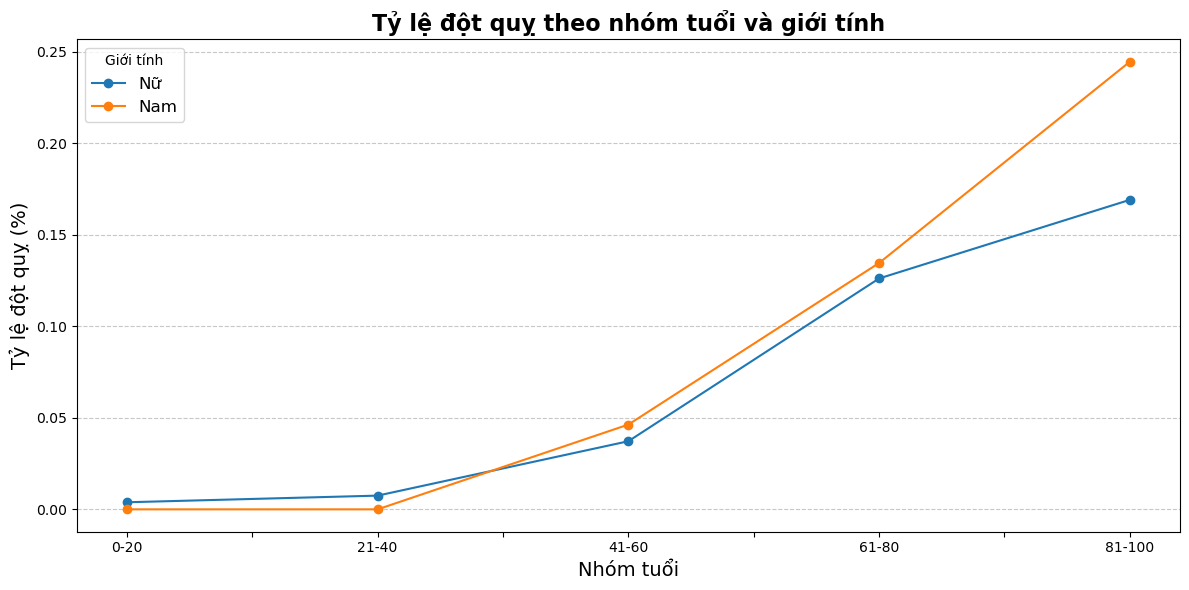

Nhóm tuổi có sự khác biệt rõ rệt nhất giữa nam và nữ: 81-100


In [46]:
gender_age_stroke = df[(df['gender'] == 'Female') | (df['gender'] == 'Male')].groupby(['age_group', 'gender'], observed=False)['stroke'].mean().unstack()


# Plot the relationship between age group and stroke rates for each gender
fig, ax = plt.subplots(figsize=(12, 6))
gender_age_stroke.plot(kind='line', marker='o', ax=ax)

# Customizing the plot for better visualization
ax.set_title("Tỷ lệ đột quỵ theo nhóm tuổi và giới tính", fontsize=16, fontweight='bold')
ax.set_xlabel("Nhóm tuổi", fontsize=14)
ax.set_ylabel("Tỷ lệ đột quỵ (%)", fontsize=14)
ax.legend(title="Giới tính", fontsize=12, loc='upper left', labels=['Nữ', 'Nam'])
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Find age group with the largest gender difference in stroke rates
gender_age_stroke['Difference'] = abs(gender_age_stroke['Male'] - gender_age_stroke['Female'])
largest_difference = gender_age_stroke['Difference'].idxmax()

print(f"Nhóm tuổi có sự khác biệt rõ rệt nhất giữa nam và nữ: {largest_difference}")


**Phân tích**
- Ở độ tuổi 40 trở xuống, tỷ lệ đột quỵ ở nữ cao hơn ở nam
- Sau 40 tuổi, tỷ lệ đột quỵ ở nam tăng nhanh hơn tỷ lệ ở nữ. Và từ nhóm tuôi 40 trở đi, tỷ lệ của nam luôn cao hơn nữ
- Ở nhóm tuổi 81-100 thì sự khác biệt về tỷ lệ giữa nam và nữ rõ nhất

### **Kết luận tổng hợp về mối quan hệ giữa tuổi tác và đột quỵ**

#### **1. Tuổi tác và nguy cơ đột quỵ**
- Tuổi tác là một trong những yếu tố nguy cơ lớn nhất đối với đột quỵ, với nguy cơ tăng dần theo độ tuổi.
  - Tỷ lệ đột quỵ rất thấp ở nhóm tuổi trẻ (dưới 40 tuổi, 0.2–0.5%) và tăng mạnh từ 41 tuổi trở đi.
  - Nhóm tuổi 61–80 có nguy cơ đáng kể (**12.96%**), và nhóm 81–100 có nguy cơ cao nhất (**19.83%**).
- Tuổi trung bình của người bị đột quỵ là **67.73 tuổi**, cao hơn nhiều so với người không bị đột quỵ (**41.97 tuổi**). Điều này cho thấy đột quỵ chủ yếu xảy ra ở người lớn tuổi.


#### **2. Tác động của các yếu tố nguy cơ theo tuổi**
Mối quan hệ giữa tuổi tác và đột quỵ không tồn tại độc lập mà bị ảnh hưởng bởi các yếu tố nguy cơ như tăng huyết áp, bệnh tim, BMI, và hút thuốc.

##### **Tăng huyết áp:**
- Ở người lớn tuổi (trên 60), tăng huyết áp làm tăng nguy cơ đột quỵ lên đến **18.18%** so với **11.55%** ở nhóm không bị tăng huyết áp.
- Ở người trẻ (dưới 40 tuổi), tác động của tăng huyết áp ít rõ rệt hơn.

##### **Bệnh tim:**
- Bệnh tim làm tăng nguy cơ đột quỵ đáng kể ở nhóm tuổi lớn:
  - Tỷ lệ đột quỵ ở nhóm tuổi 61–80 có bệnh tim là **19.13%**, cao hơn nhiều so với nhóm không bị bệnh tim (**11.84%**).
- Ở nhóm tuổi trẻ, bệnh tim không phải yếu tố nguy cơ lớn.

##### **BMI (chỉ số cơ thể):**
- Người có BMI cao ("Béo phì") thường có nguy cơ đột quỵ cao hơn:
  - Ở nhóm tuổi 41–60, tỷ lệ đột quỵ ở nhóm béo phì là **4.73%**, cao hơn so với các nhóm BMI khác.
- Ở nhóm tuổi cao (81–100), nguy cơ tăng cao ở cả nhóm "Béo phì" và "Dưới chuẩn", cho thấy sức khỏe dinh dưỡng kém cũng là yếu tố nguy cơ.

##### **Hút thuốc:**
- Hút thuốc làm tăng nguy cơ đột quỵ, đặc biệt rõ rệt từ 41 tuổi trở lên:
  - Nhóm 41–60 tuổi có tỷ lệ đột quỵ ở người "Có hút" đạt **5.31%**, cao hơn nhóm "Chưa bao giờ hút" (**3.05%**).
- Ở nhóm tuổi 81–100, người "Có hút" có tỷ lệ đột quỵ cao nhất (**27.27%**).


#### **3. Sự khác biệt giới tính trong nguy cơ đột quỵ**
- Ở nhóm tuổi trẻ (<40 tuổi), nữ giới có nguy cơ đột quỵ cao hơn nam giới.
- Từ 40 tuổi trở đi, tỷ lệ đột quỵ ở nam giới tăng nhanh hơn nữ giới và luôn cao hơn nữ ở các nhóm tuổi lớn hơn.
- Nhóm tuổi có sự khác biệt rõ rệt nhất là **81–100**, nơi nam giới có nguy cơ cao hơn nữ đáng kể.


#### **4. Đặc điểm của nhóm đột quỵ trẻ tuổi**
- Người trẻ (<40 tuổi) bị đột quỵ có các đặc điểm nguy cơ nổi bật:
  - **Tăng huyết áp:** Tỷ lệ cao (**12.5%**) so với nhóm không bị đột quỵ (**1.67%**).
  - **BMI cao:** Trung bình **29.98**, gần ngưỡng béo phì.
  - **Hút thuốc:** Tỷ lệ hút thuốc cao (đang hút **37.5%**, đã từng hút **25%**).


---
### **Kết luận**
1. **Nguy cơ gia tăng theo tuổi:** Đột quỵ chủ yếu xảy ra ở người lớn tuổi, đặc biệt từ 61 tuổi trở lên. Tuổi tác đóng vai trò quan trọng nhất trong nguy cơ đột quỵ.
2. **Tương tác với yếu tố nguy cơ:**
   - Tăng huyết áp và bệnh tim là yếu tố nguy cơ chính ở người cao tuổi.
   - Hút thuốc và BMI cao là yếu tố nguy cơ nổi bật ở người trẻ.
3. **Sự khác biệt giới tính:** Nam giới trên 40 tuổi có nguy cơ cao hơn nữ giới, với sự khác biệt rõ nhất ở nhóm 81–100 tuổi.
4. **Nhóm đột quỵ trẻ tuổi:** Tăng huyết áp, BMI cao, và hút thuốc là các yếu tố nguy cơ chính.

## Câu 3: Sự kết hợp của những yếu tố nào làm gia tăng nguy cơ đột quỵ cao nhất

**Bước 1: Chọn các đặc trưng có khả năng ảnh hưởng**
- **Mục tiêu**: Xác định các yếu tố có tiềm năng liên quan đến nguy cơ đột quỵ.  
- **Thực hiện**: 
  - Tính ma trận tương quan giữa các đặc trưng và biến mục tiêu `stroke`.
  - Dựa vào kiến thức y học, lưu ý các đặc trưng như: 
    - `hypertension` (huyết áp cao)
    - `heart_disease` (bệnh tim)
    - `avg_glucose_level` (mức glucose trung bình)
    - `bmi` (chỉ số BMI)
    - `smoking_status` (tình trạng hút thuốc)
    - `age` (tuổi)
  - Loại bỏ các đặc trưng ít liên quan hoặc có tương quan rất thấp với `stroke`.


In [47]:
import warnings 
warnings.filterwarnings('ignore')
# basic libraries
import os
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import time
#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from pywaffle import Waffle
%matplotlib inline
init_notebook_mode(connected= True)
#Common model helpers
from sklearn.preprocessing import (StandardScaler,  LabelEncoder, OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,auc, precision_score, recall_score, f1_score,  roc_auc_score, confusion_matrix)
from sklearn.model_selection import (GridSearchCV, StratifiedKFold, cross_val_score)
# dimensionality reduction
from sklearn.decomposition import PCA
# from umap import UMAP
import pylab as pl
# imbalance dataset handling
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)

# model algorithams
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'missingno'

In [ ]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df['phanloai_bmi'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['phanloai_age'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['phanloai_glucose'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df.dtypes

id                      int64
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
phanloai_bmi         category
phanloai_age         category
phanloai_glucose     category
dtype: object

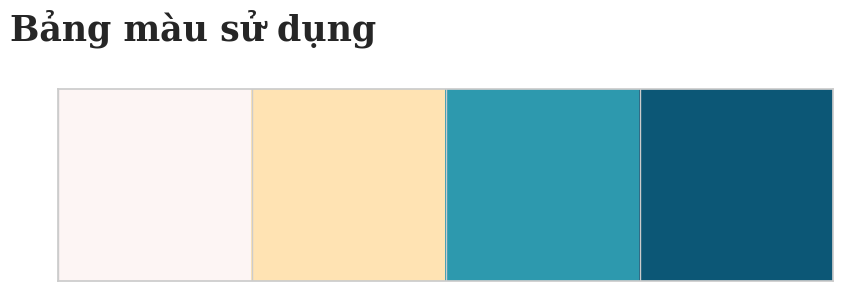

In [ ]:
colors = ['#fdf5f4','#ffe3B3','#2d99ae','#0c5776']
palette = sns.color_palette( palette = colors)
sns.palplot(palette, size =2.5)
plt.text(-0.75,-0.75,'Bảng màu sử dụng', {'font':'serif', 'size':25, 'weight':'bold'})
plt.show()

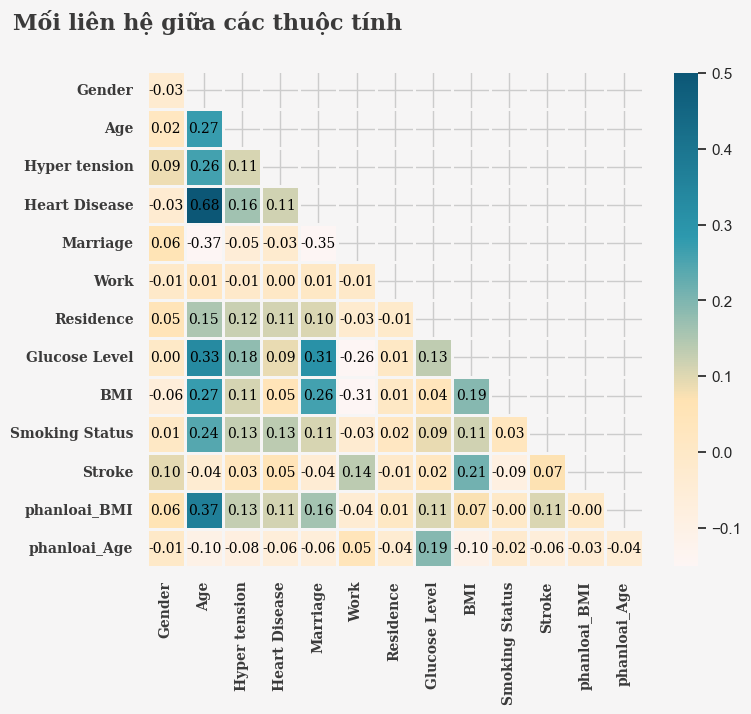

In [ ]:
df_copy = df.copy()
df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x + 10) * 3)
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x + 10) * 2)
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x + 10) * 2)
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])

cols = df_copy.columns
df_copy[cols] = ss.fit_transform(df_copy[cols])
df_corr = df_copy.drop(columns=['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
colors = ['#fdf5f4', '#ffe3B3', '#2d99ae', '#0c5776']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=colormap,
            vmin=-0.15, vmax=0.5, cbar_kws={"shrink": .8, "orientation": "vertical"}, ax=ax,
            linewidths=1, linecolor='#f6f5f5', square=True,
            annot_kws={'font': 'serif', 'size': 10, 'color': 'black'})
ax.tick_params(axis='y', rotation=0)
xticks = ['Gender', 'Age', 'Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 
          'BMI', 'Smoking Status', 'Stroke', 'phanloai_BMI', 'phanloai_Age']
yticks = ['Gender', 'Age', 'Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 
          'BMI', 'Smoking Status', 'Stroke', 'phanloai_BMI', 'phanloai_Age']

ax.set_xticklabels(xticks, fontdict={'fontname': 'serif', 'size': 10, 'weight': 'bold'}, rotation=90, alpha=0.9)
ax.set_yticklabels(yticks, fontdict={'fontname': 'serif', 'size': 10, 'weight': 'bold'}, rotation=0, alpha=0.9)
ax.text(-3.5, -1.1, 'Mối liên hệ giữa các thuộc tính', {'font': 'serif', 'size': 16, 'weight': 'bold'}, alpha=0.9)
plt.show()

## **Nhận xét**: 
- Stroke chỉ bị ảnh hưởng bởi các yếu tố: BMI, work, gender, heart disease, hypertension. 

### **Bước 3: Tạo các nhóm hoặc tổ hợp đặc trưng**
- **Mục tiêu**: Tìm hiểu sự kết hợp giữa các yếu tố gây nên nguy cơ đột quỵ.  
- **Thực hiện**:
  - Tạo các tổ hợp đặc trưng, ví dụ: 
    - `age` và `hypertension`
    - `heart_disease` và `smoking_status`
    - `avg_glucose_level` và `bmi`
    - ......
  - Vẽ biểu đồ cho từng nhóm và đưa ra nhận xét. 

---

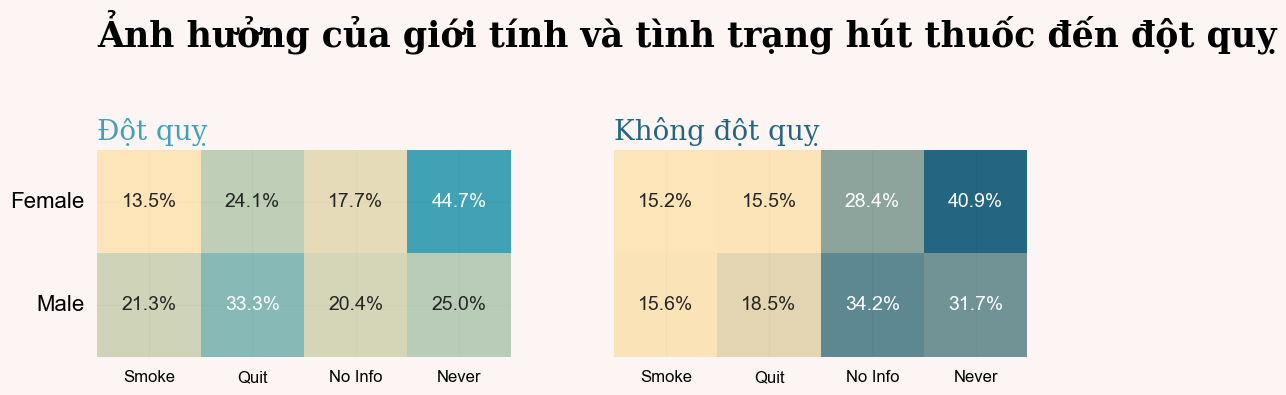

In [ ]:
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('#fdf5f4')
ax0.set_facecolor('#fdf5f4')
ax1.set_facecolor('#fdf5f4')
healthy = df[df['stroke'] == 0]
stroke = df[df['stroke'] == 1]

gender_order = ['Female', 'Male']
smoking_order = ['smokes', 'formerly smoked', 'Unknown', 'never smoked']
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffe3B3', '#2d99ae'], N=256)
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffe3B3', '#0c5776'], N=256)
data_stroke = pd.crosstab(stroke['gender'], stroke['smoking_status'], normalize='index').loc[gender_order, smoking_order]
data_no_stroke = pd.crosstab(healthy['gender'], healthy['smoking_status'], normalize='index').loc[gender_order, smoking_order]
sns.heatmap(ax=ax0, data=data_stroke, linewidths=0, square=True, cbar=False, cmap=colormap1, 
            annot=True, fmt='.1%', annot_kws={"fontsize": 14}, alpha=0.9)
sns.heatmap(ax=ax1, data=data_no_stroke, linewidths=0, square=True, cbar=False, cmap=colormap2, 
            annot=True, fmt='.1%', annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, -1., 'Ảnh hưởng của giới tính và tình trạng hút thuốc đến đột quỵ', 
         fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.1, 'Đột quỵ', fontdict={'family': 'serif', 'color': "#2d99ae", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'Không đột quỵ', fontdict={'family': 'serif', 'color': "#0c5776", 'size': 20}, alpha=0.9)
ax0.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontsize=12, color='black')
ax1.set_xticklabels(['Smoke', 'Quit', 'No Info', 'Never'], fontsize=12, color='black')
ax0.set_yticklabels(gender_order, fontsize=16, color='black', rotation=0)
ax1.axes.get_yaxis().set_visible(False)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.tight_layout()
plt.show()


**Nhận xét**: 
- Theo dữ liệu trên, nam giới bỏ hút thuốc và nữ giới chưa từng hút thuốc lại có tỉ lệ đột quỵ cao ! 

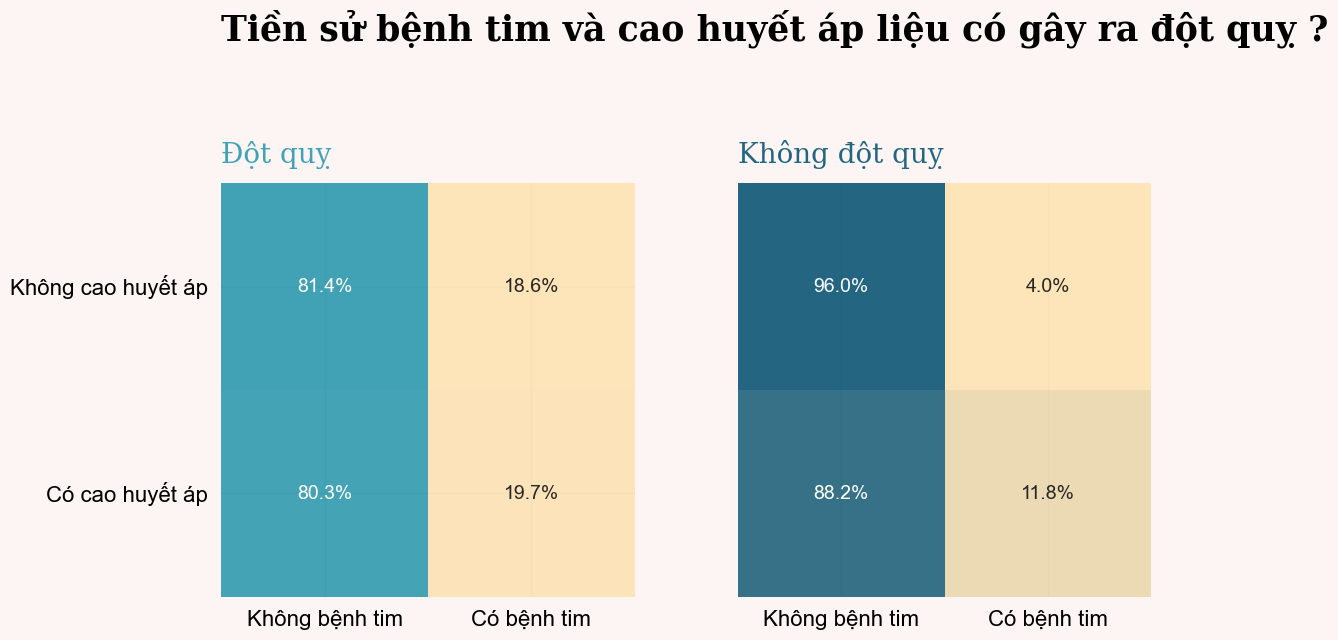

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

fig.patch.set_facecolor('#fdf5f4')
ax0.set_facecolor('#fdf5f4')
ax1.set_facecolor('#fdf5f4')
healthy = df[df['stroke'] == 0]
stroke = df[df['stroke'] == 1]
col1 = ["#ffe3B3", "#2d99ae"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = ["#ffe3B3", "#0c5776"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)
data_stroke = pd.crosstab(stroke['hypertension'], stroke['heart_disease'], normalize='index')
data_no_stroke = pd.crosstab(healthy['hypertension'], healthy['heart_disease'], normalize='index')
sns.heatmap(ax=ax0, data=data_stroke, linewidths=0, square=True, cbar=False, cmap=colormap1, 
            annot=True, fmt='.1%', annot_kws={"fontsize": 14}, alpha=0.9)
sns.heatmap(ax=ax1, data=data_no_stroke, linewidths=0, square=True, cbar=False, cmap=colormap2, 
            annot=True, fmt='.1%', annot_kws={"fontsize": 14}, alpha=0.9)
ax0.text(0, -0.69, 'Tiền sử bệnh tim và cao huyết áp liệu có gây ra đột quỵ ?', 
         fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 25})
ax0.text(0, -0.1, 'Đột quỵ', fontdict={'family': 'serif', 'color': "#2d99ae", 'size': 20}, alpha=0.9)
ax1.text(0, -0.1, 'Không đột quỵ', fontdict={'family': 'serif', 'color': "#0c5776", 'size': 20}, alpha=0.9)
ax0.set_xticklabels(['Không bệnh tim', 'Có bệnh tim'], fontsize=16, color='black')
ax1.set_xticklabels(['Không bệnh tim', 'Có bệnh tim'], fontsize=16, color='black')
ax0.set_yticklabels(['Không cao huyết áp', 'Có cao huyết áp'], fontsize=16, color='black', rotation=0)
ax1.axes.get_yaxis().set_visible(False)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')
plt.tight_layout()
plt.show()

**Nhận xét:** 
- Người không bị bệnh tim và không cao huyết áp vẫn có nguy cơ cao bị đột quỵ !

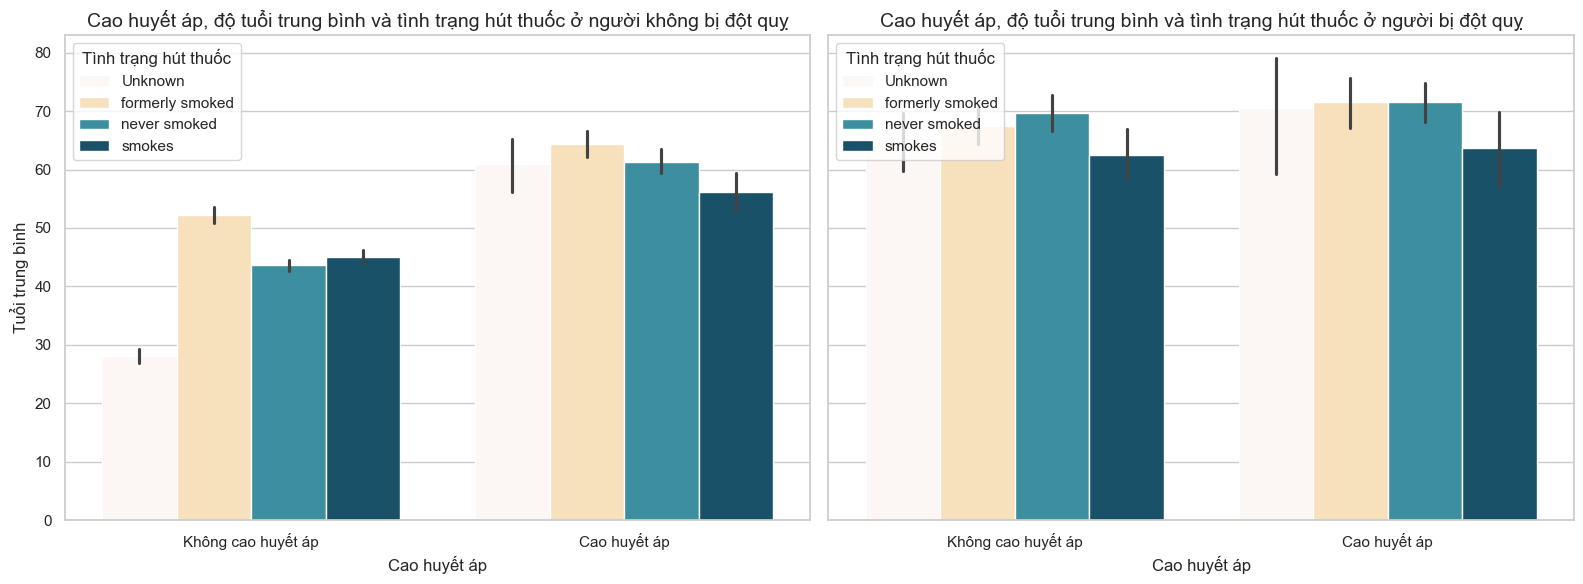

In [ ]:
data_stroke_0 = df[df['stroke'] == 0]
data_stroke_1 = df[df['stroke'] == 1]
sns.set(style="whitegrid")
colors = ['#fdf5f4','#ffe3B3','#2d99ae','#0c5776']
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
hue_order = sorted(df['smoking_status'].unique())
# Biểu đồ cho stroke = 0
sns.barplot(
    data=data_stroke_0, 
    x='hypertension', 
    y='age', 
    hue='smoking_status',
    hue_order=hue_order, 
    palette=colors, 
    ax=axes[0]
)
axes[0].set_title('Cao huyết áp, độ tuổi trung bình và tình trạng hút thuốc ở người không bị đột quỵ', fontsize=14)
axes[0].set_xlabel('Cao huyết áp', fontsize=12)
axes[0].set_ylabel('Tuổi trung bình', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Không cao huyết áp', 'Cao huyết áp'])
axes[0].legend(title='Tình trạng hút thuốc', loc='upper left')
# Biểu đồ cho stroke = 1
sns.barplot(
    data=data_stroke_1, 
    x='hypertension', 
    y='age', 
    hue='smoking_status', 
    hue_order=hue_order,
    palette=colors, 
    ax=axes[1]
)
axes[1].set_title('Cao huyết áp, độ tuổi trung bình và tình trạng hút thuốc ở người bị đột quỵ', fontsize=14)
axes[1].set_xlabel('Cao huyết áp', fontsize=12)
axes[1].set_ylabel('')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Không cao huyết áp', 'Cao huyết áp'])
axes[1].legend(title='Tình trạng hút thuốc', loc='upper left')
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

**Nhận xét:**
- Đa số người bị đột quỵ có độ tuổi trung bình cao ( 60 - 70 tuổi). 
- Người chưa từng hút thuốc và đang hút thuốc lại có khả năng đột quỵ cao nhất ! 
- Trong khi người hiện đang hút thuốc lại có tỉ lệ đột quỵ thấp nhất ! 

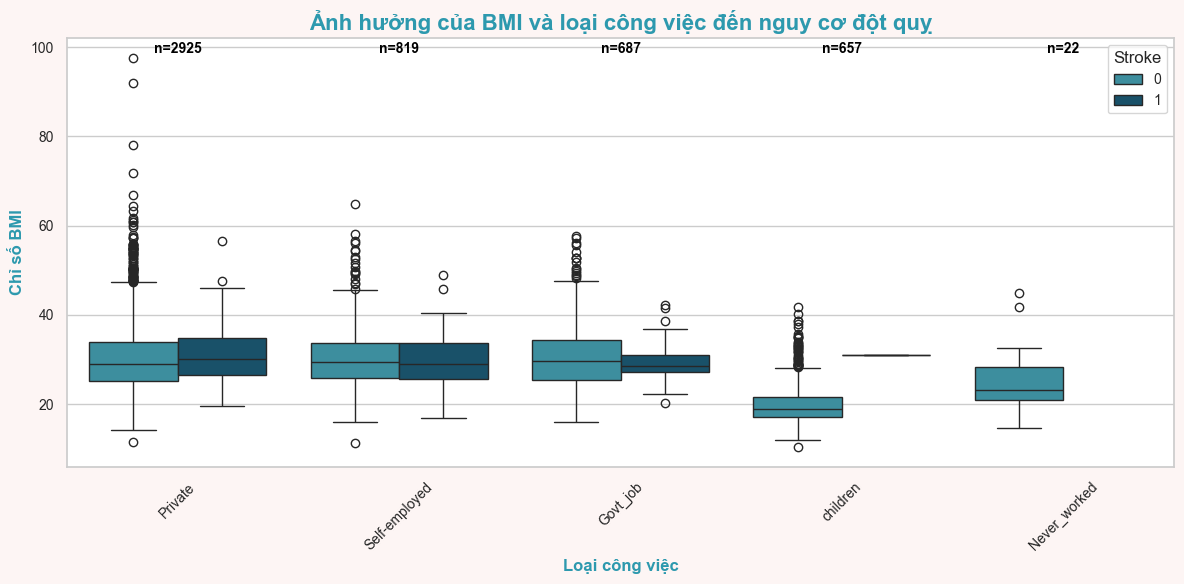

In [ ]:
# Tạo figure và thiết lập màu nền
plt.figure(figsize=(12, 6))
plt.gcf().set_facecolor('#fdf5f4')

# Vẽ boxplot
sns.boxplot(data=df, x='work_type', y='bmi', hue='stroke', palette=['#2d99ae', '#0c5776'])

# Thêm tiêu đề và chú thích trục
plt.title('Ảnh hưởng của BMI và loại công việc đến nguy cơ đột quỵ', fontsize=16, fontweight='bold', color='#2d99ae')
plt.xlabel('Loại công việc', fontsize=12, fontweight='bold', color='#2d99ae')
plt.ylabel('Chỉ số BMI', fontsize=12, fontweight='bold', color='#2d99ae')

# Tùy chỉnh nhãn trên trục x
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Tính số lượng mẫu của từng nhóm
work_type_counts = df['work_type'].value_counts()

# Hiển thị giá trị của work_type lên biểu đồ
# Lấy thứ tự các nhóm trên boxplot từ trục x
x_order = df['work_type'].value_counts().index
for i, work_type in enumerate(x_order):
    count = work_type_counts[work_type]
    plt.text(i, df['bmi'].max() + 1, f'n={count}', 
             horizontalalignment='center', fontsize=10, color='black', fontweight='bold')

# Hiển thị chú thích (legend)
plt.legend(title='Stroke', title_fontsize=12, fontsize=10, loc='upper right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét**: 
- Đa phần người đột quỵ có BMI trong khoảng 25 - 35. 
- Người đột quỵ không có ai có BMI trên 60. 
- Số lượng người đột quỵ nhiều nhất là ở người làm công việc Private. 

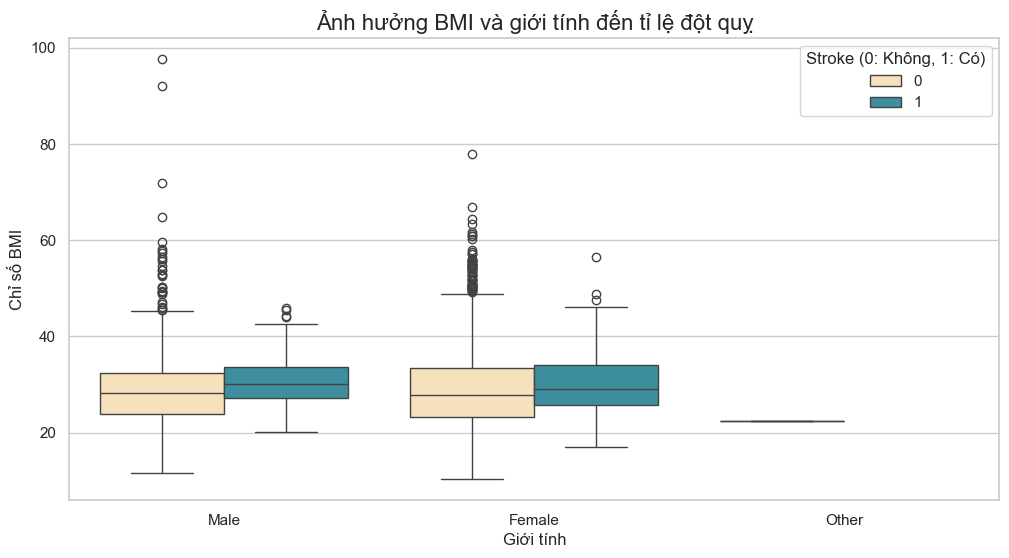

In [ ]:
# Màu sắc tùy chỉnh
colors = ['#ffe3B3', '#2d99ae']  # Chỉ lấy 2 màu đầu cho stroke

# Tạo biểu đồ hộp (boxplot) cho BMI theo gender và stroke với màu tùy chỉnh
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='bmi', hue='stroke', palette=colors)

# Chỉnh sửa tiêu đề và nhãn
plt.title('Ảnh hưởng BMI và giới tính đến tỉ lệ đột quỵ', fontsize=16)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Chỉ số BMI', fontsize=12)

# Thêm nhãn cho Stroke
plt.legend(title='Stroke (0: Không, 1: Có)', loc='upper right')

# Hiển thị biểu đồ
plt.show()

**Nhận xét**: 
- Ở cả nam và nữ, người đột quỵ thường có BMI cao hơn người không bị.
- BMI của người đột quỵ chỉ nằm trong mức 20 đến 60. 
- Một số người có BMI rất cao hoặc rất thấp lại không bị đột quỵ. 
- Người thuộc giới tính thứ ba có số lượng đột quỵ rất ít, điều này là do có rất ít số liệu. 
- Người đột quỵ ở cả nam và nữ giới đều có số lượng trong khoảng 25 - 35. 

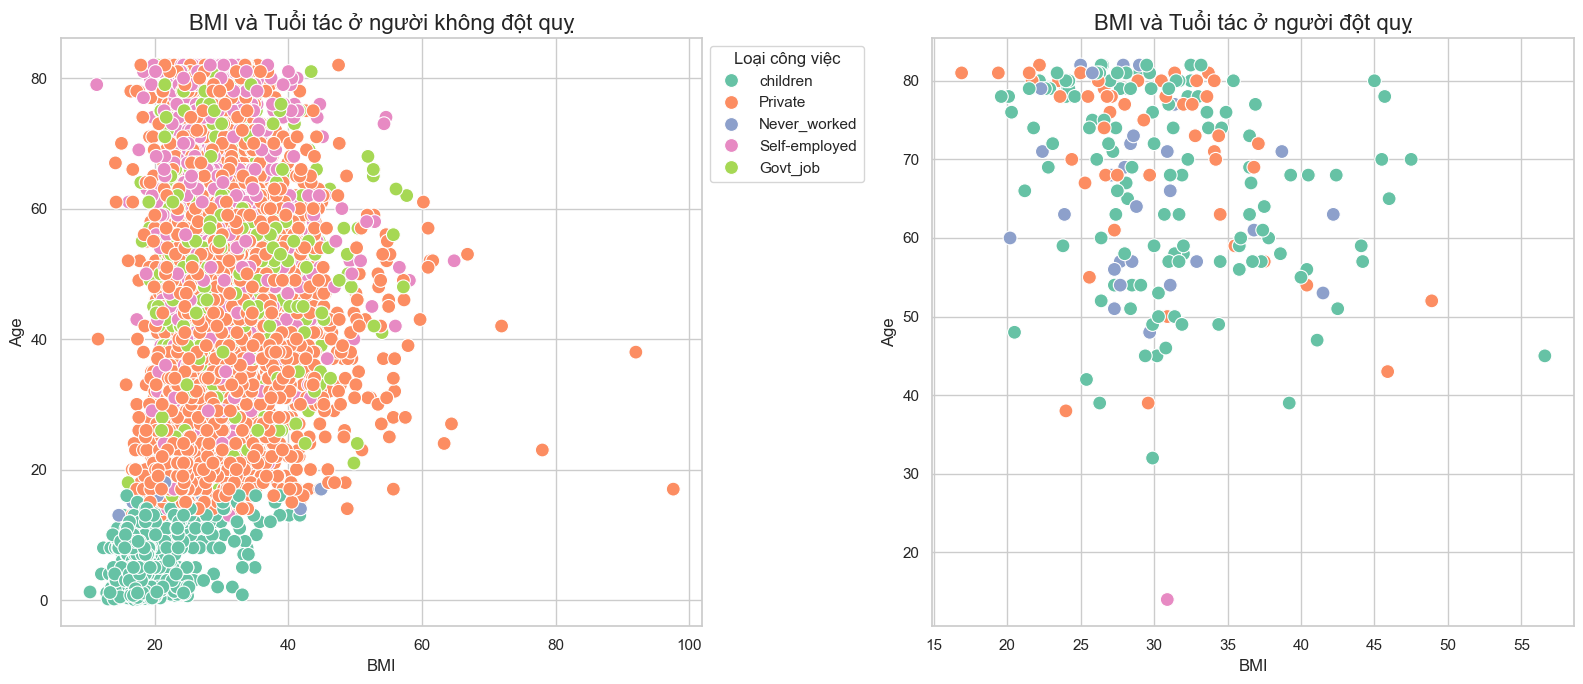

In [ ]:
# Tạo hai DataFrame riêng biệt, một cho stroke = 0 và một cho stroke = 1
df_stroke_0 = df[df['stroke'] == 0]
df_stroke_1 = df[df['stroke'] == 1]

# Tạo hai biểu đồ phân tán cho mỗi nhóm stroke
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Biểu đồ cho stroke = 0
sns.scatterplot(data=df_stroke_0, x='bmi', y='age', hue='work_type', palette='Set2', ax=axes[0], marker="o", s=100)
axes[0].set_title('BMI và Tuổi tác ở người không đột quỵ', fontsize=16)
axes[0].set_xlabel('BMI', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)
axes[0].legend(title='Loại công việc', loc='upper left', bbox_to_anchor=(1, 1))

# Biểu đồ cho stroke = 1
sns.scatterplot(data=df_stroke_1, x='bmi', y='age', hue='work_type', palette='Set2', ax=axes[1], marker="o", s=100, legend = False)
axes[1].set_title('BMI và Tuổi tác ở người đột quỵ', fontsize=16)
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Age', fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét:** 
- Người đột quỵ đa phần nằm ở nhóm làm công việc Private và never work và có BMI tập trung trong khoảng 25 - 35. 
- 


# Tổng kết

...

### **Khuyến nghị:**
1. **Người lớn tuổi:**
   - Tăng cường kiểm tra định kỳ các yếu tố nguy cơ như tăng huyết áp và bệnh tim.
   - Duy trì chế độ ăn uống và tập luyện để giảm nguy cơ.
2. **Người trẻ:**
   - Kiểm soát lối sống, bao gồm ngừng hút thuốc và duy trì BMI hợp lý.
   - Phát hiện và điều trị sớm tăng huyết áp và các yếu tố nguy cơ tiềm ẩn.

# Tài liệu tham khảo